In [1]:
import os
os.chdir("/home/studio-lab-user/sagemaker-studiolab-notebooks/AI-OT24/Reinforcement-Learning-Stock-Porfolio-Managment")
!pip install -q -r requirements.txt
import sys
sys.path.append('./utils')
from trading_functions import *
# Core Libraries
import os
import sys
import time
import datetime
import warnings
#warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = info, 2 = warnings, 3 = errors

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Financial Data
import yfinance as yf
import quantstats as qs
import ta

# Machine Learning - Supervised Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Machine Learning - Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy

# Reinforcement Learning and Environments
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import (
    EvalCallback, StopTrainingOnRewardThreshold, StopTrainingOnNoModelImprovement
)
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecCheckNan, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import ARS, MaskablePPO, RecurrentPPO, QRDQN, TRPO

# Imitation Learning
from imitation.algorithms import bc
from imitation.testing.reward_improvement import is_significant_reward_improvement
from imitation.data.types import Transitions

# Interactive Brokers API
from ib_insync import *

from typing import Callable

from collections import Counter

clear_output()


In [2]:
# Define constants
SEED = 1
history_length = 5
reward_type = 'LNR'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2015-01-01'
end_date = '2023-06-30'
n_envs = 8
n_steps = 16
total_timesteps = 50_000
batch_size = 32
learning_rate = 0.001
ent_coef = 0.05
log_interval = 1_000
eval_freq = 1_000
model_name= 'A2C'

current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_dir = None #f'./models/model_{current_date}'
log_dir = None #f'./logs/log_{current_date}'


# Training environment
env, _ = create_training_env(history_length, reward_type, '2015-01-01', '2023-06-30', stocks, n_envs)

In [3]:
env.observation_space

Box(-inf, inf, (600,), float64)

Episode: 0/30, Score: <module 'time' (built-in)>, Epsilon: 1.00
Total return of portfolio: -100.00%


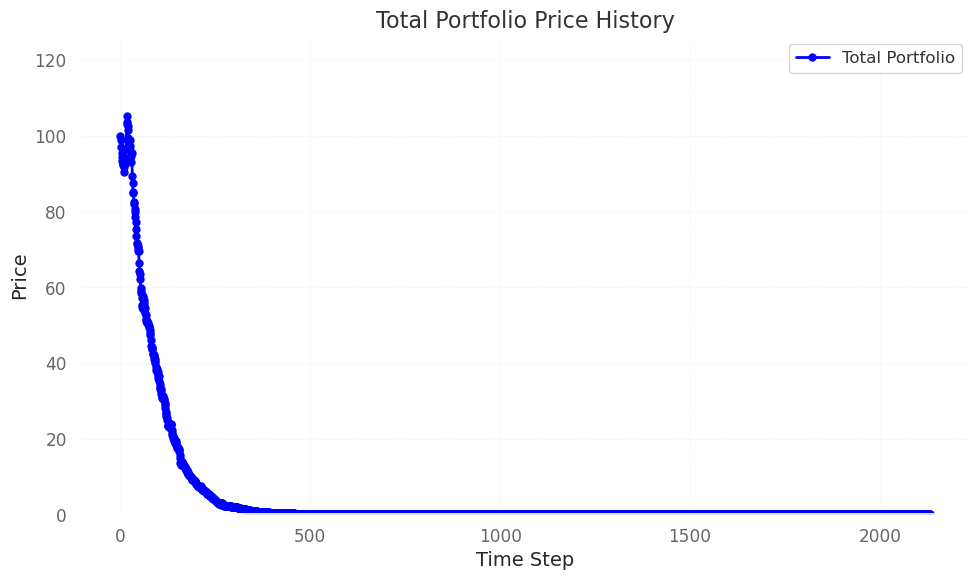

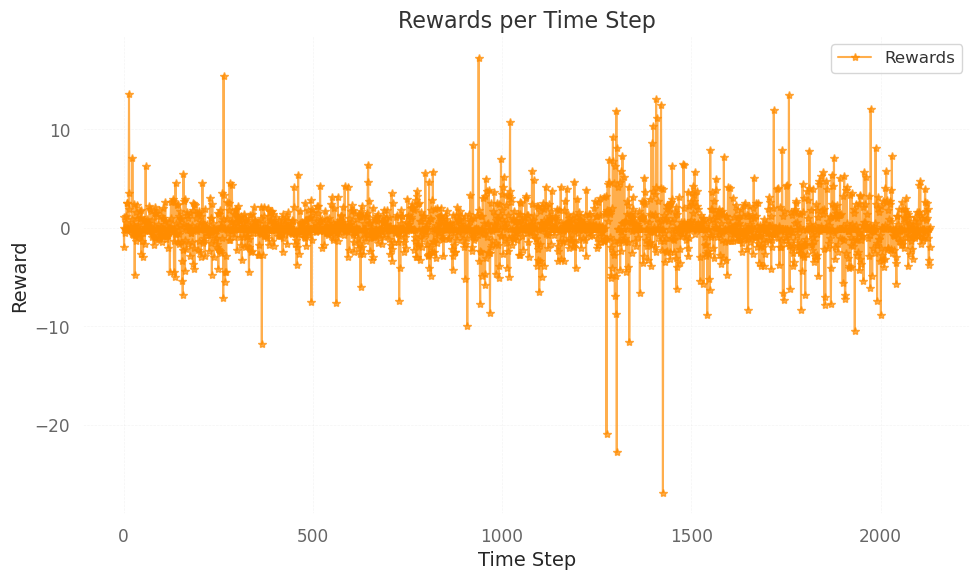

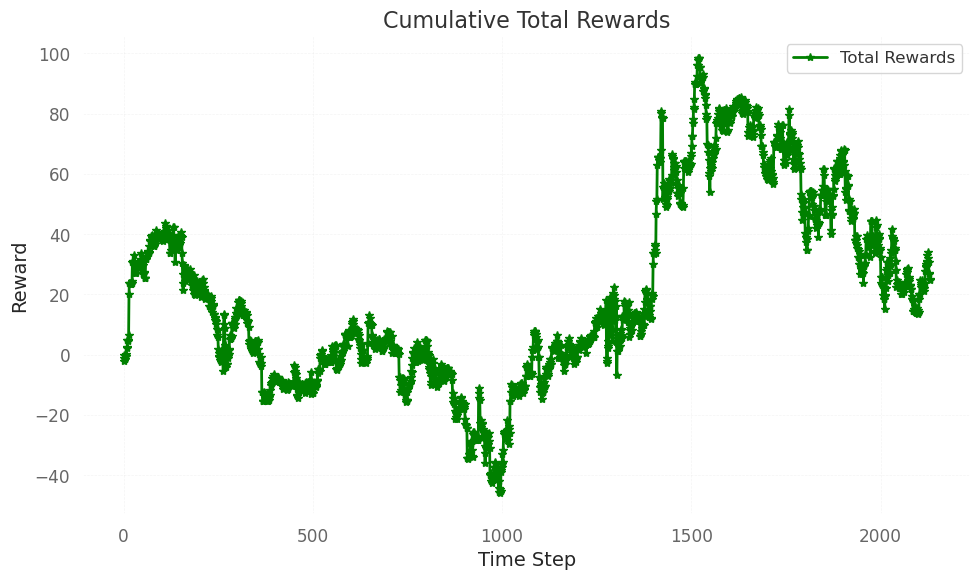

Total rewards: 24.994206341439487
Episode: 1/30, Score: <module 'time' (built-in)>, Epsilon: 0.99
Total return of portfolio: -100.00%


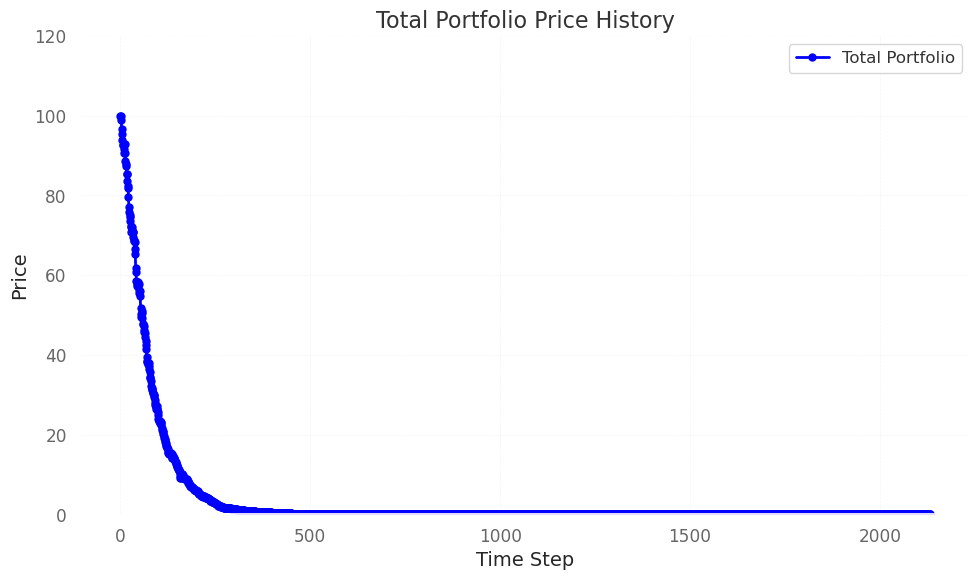

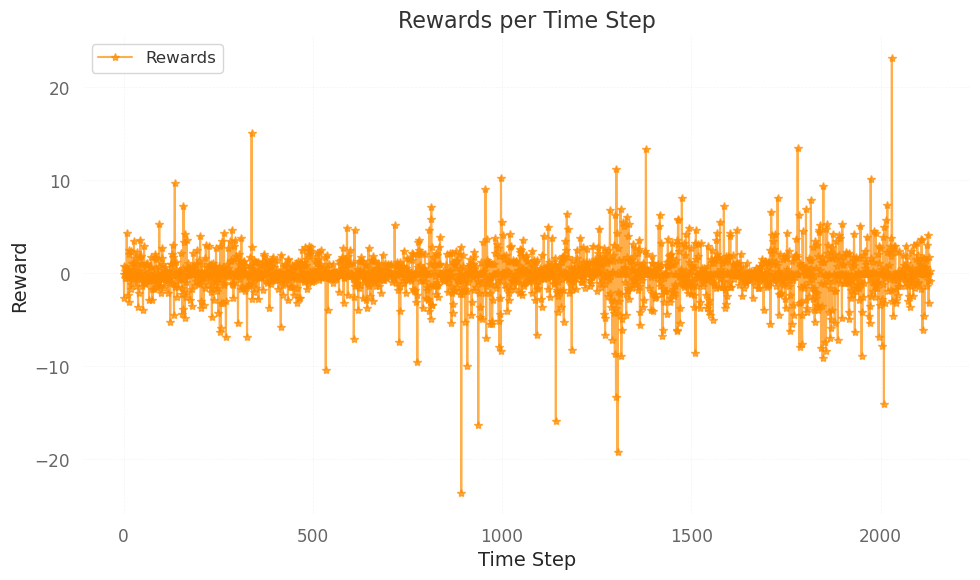

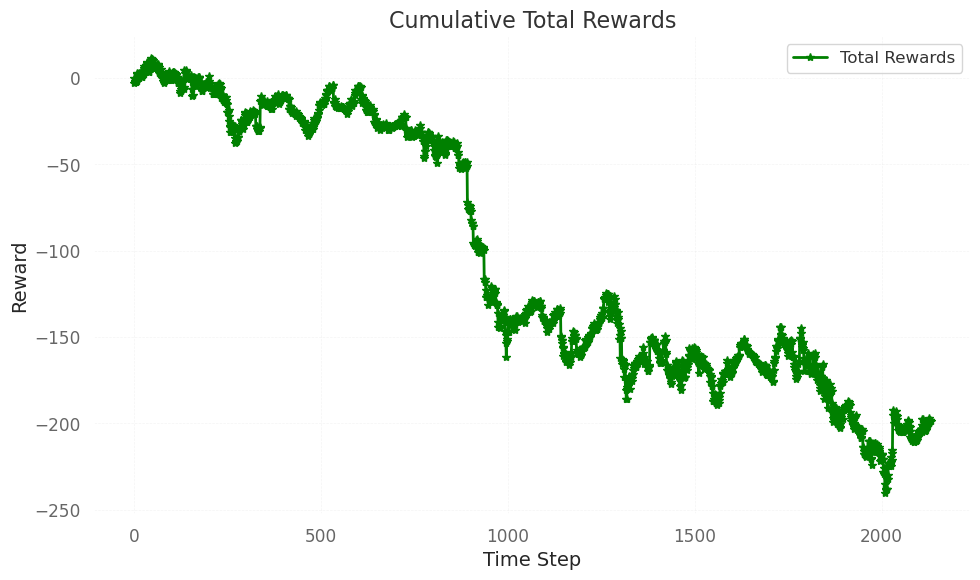

Total rewards: -198.75677919582597
Episode: 2/30, Score: <module 'time' (built-in)>, Epsilon: 0.99
Total return of portfolio: -100.00%


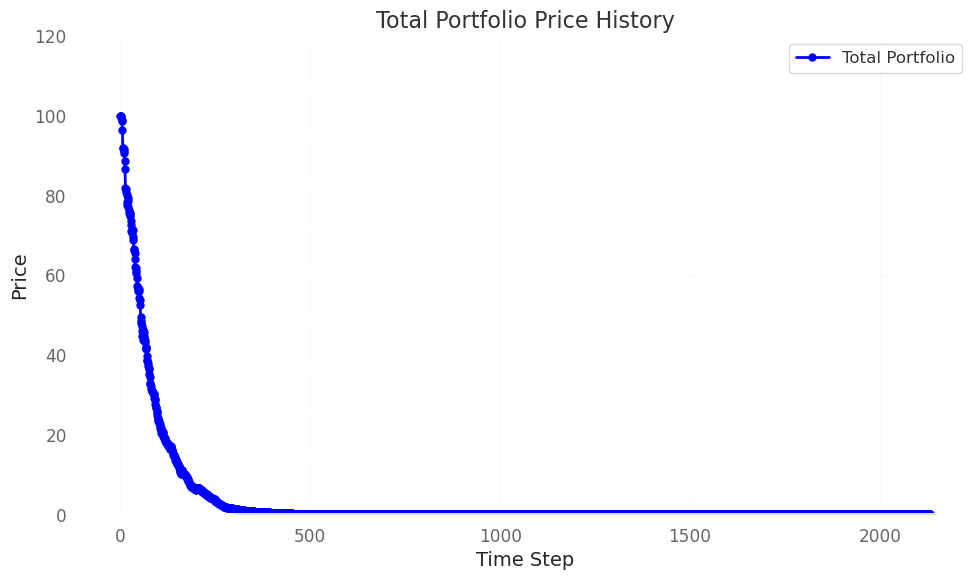

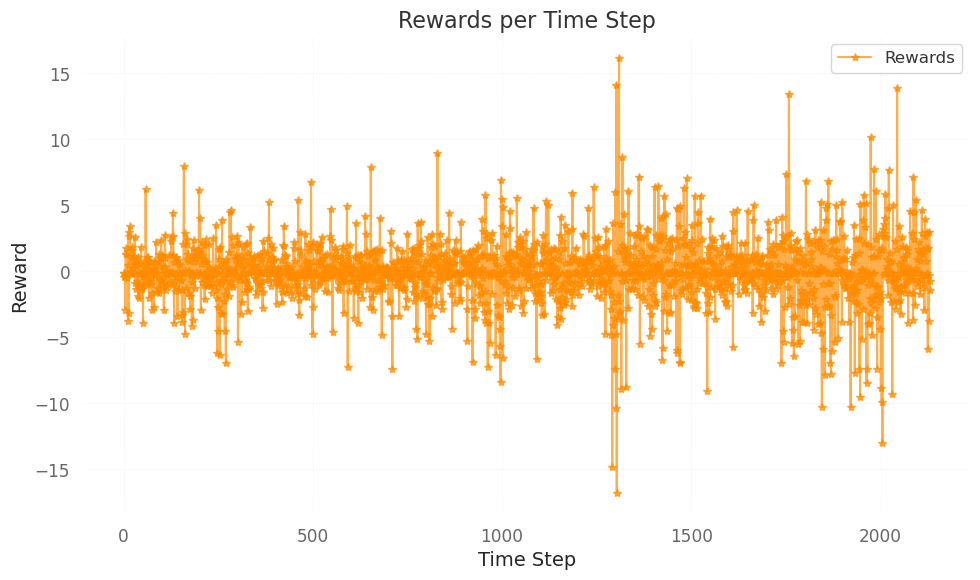

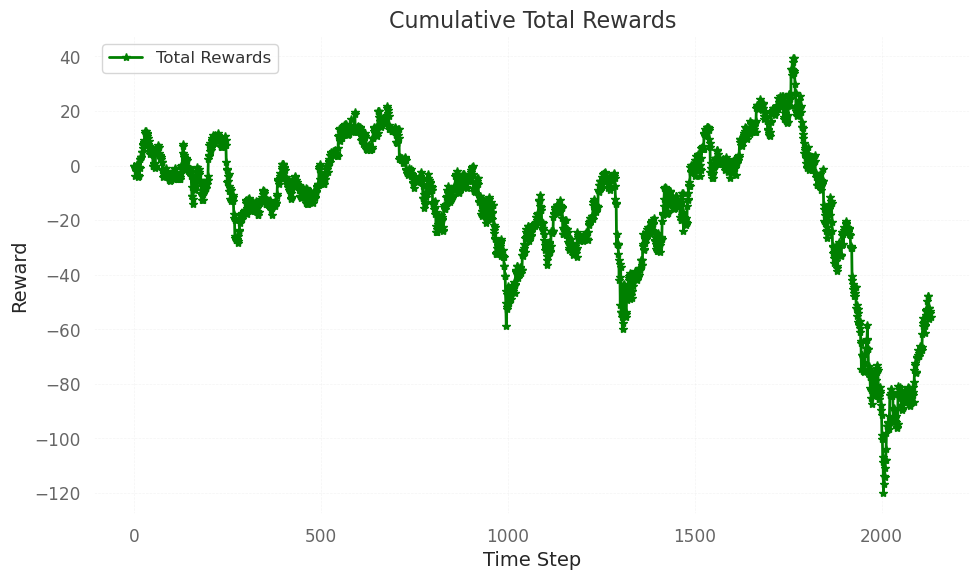

Total rewards: -55.36659200950212
Episode: 3/30, Score: <module 'time' (built-in)>, Epsilon: 0.99
Total return of portfolio: -100.00%


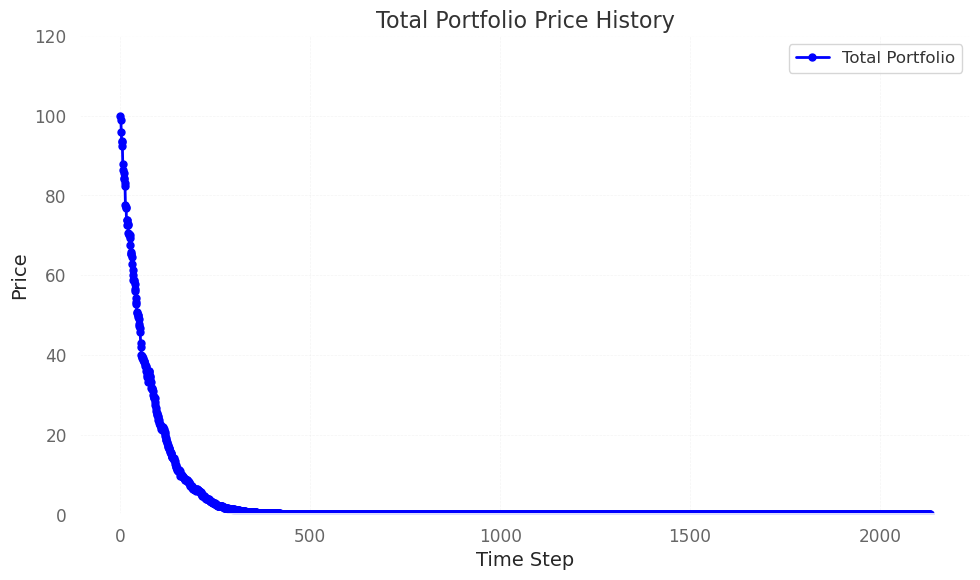

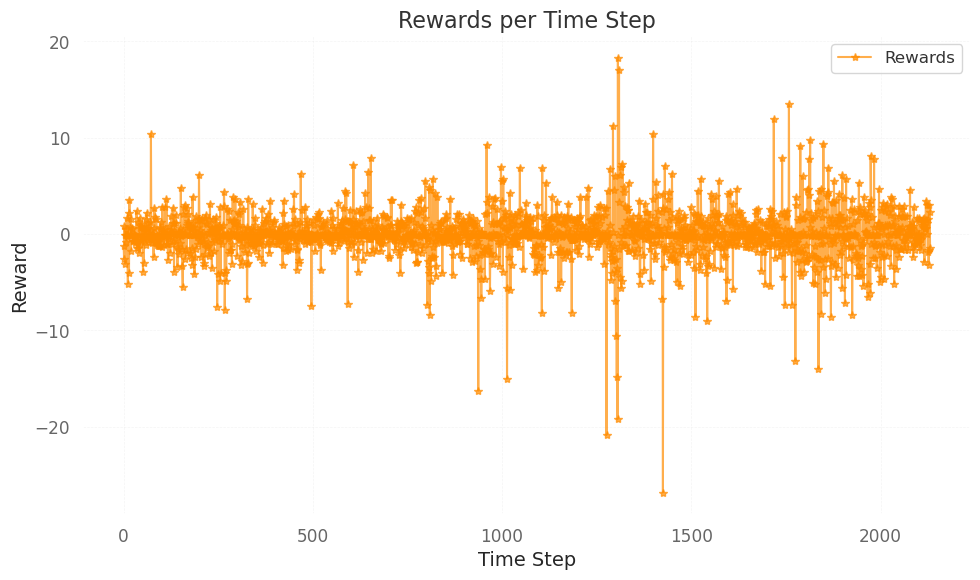

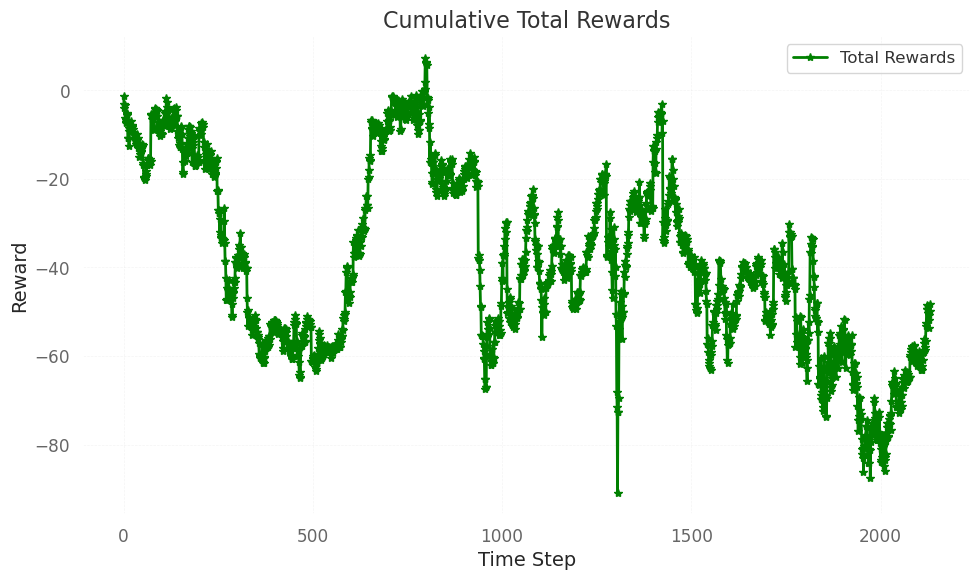

Total rewards: -49.781038063665626
Episode: 4/30, Score: <module 'time' (built-in)>, Epsilon: 0.98
Total return of portfolio: -100.00%


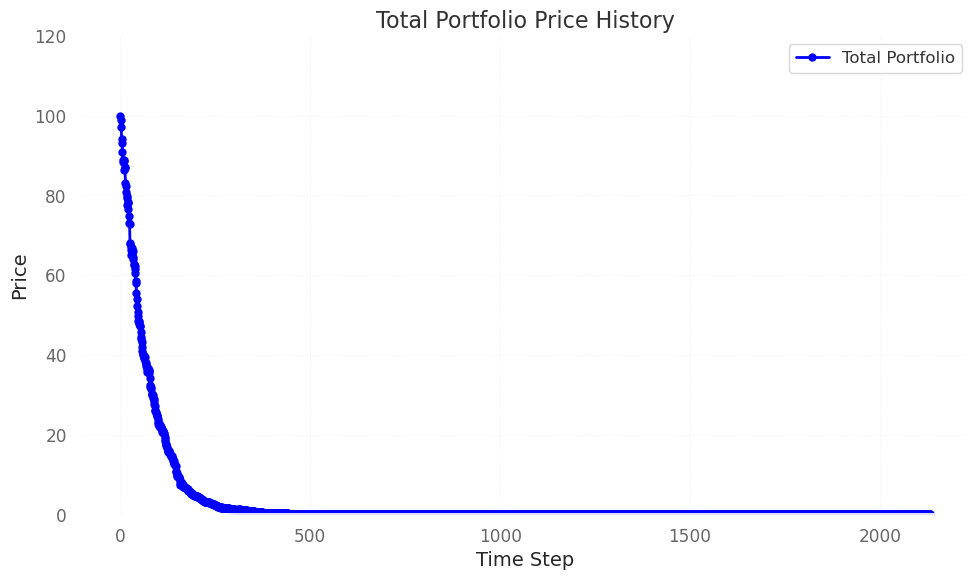

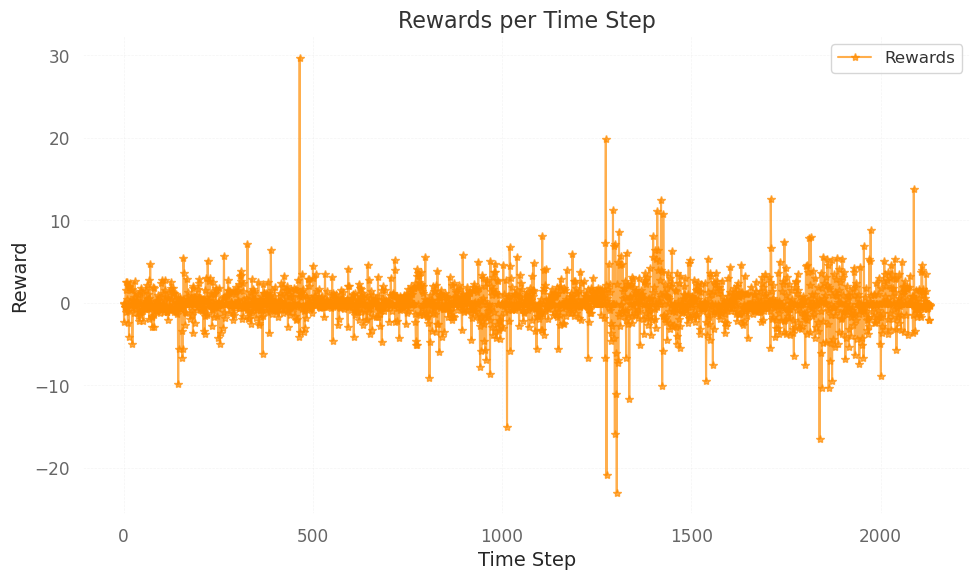

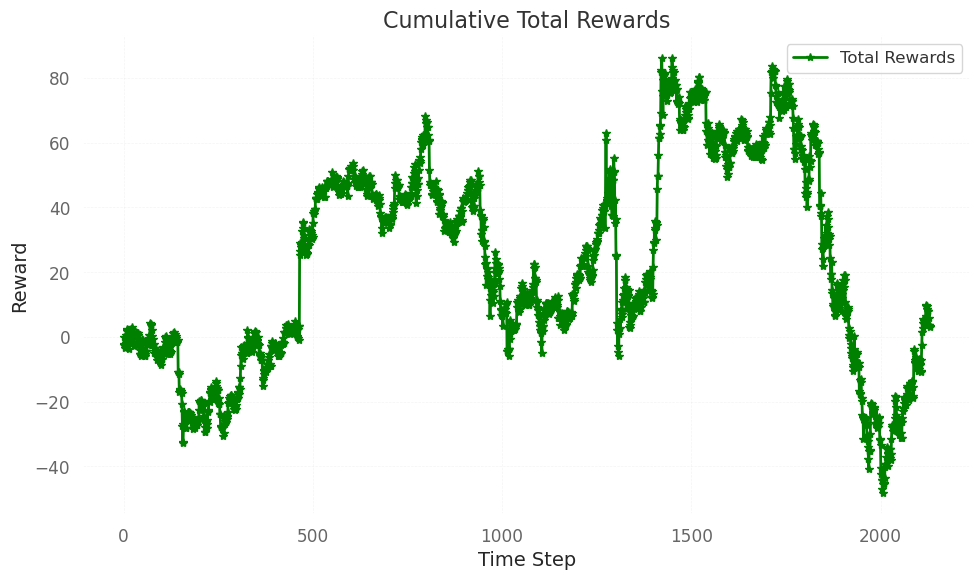

Total rewards: 3.1852034290609836
Episode: 5/30, Score: <module 'time' (built-in)>, Epsilon: 0.98
Total return of portfolio: -100.00%


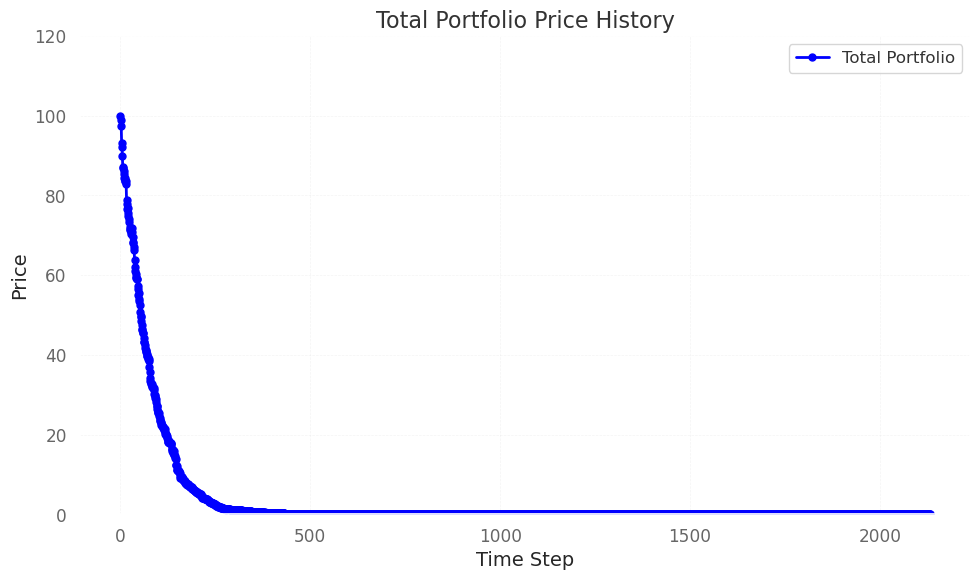

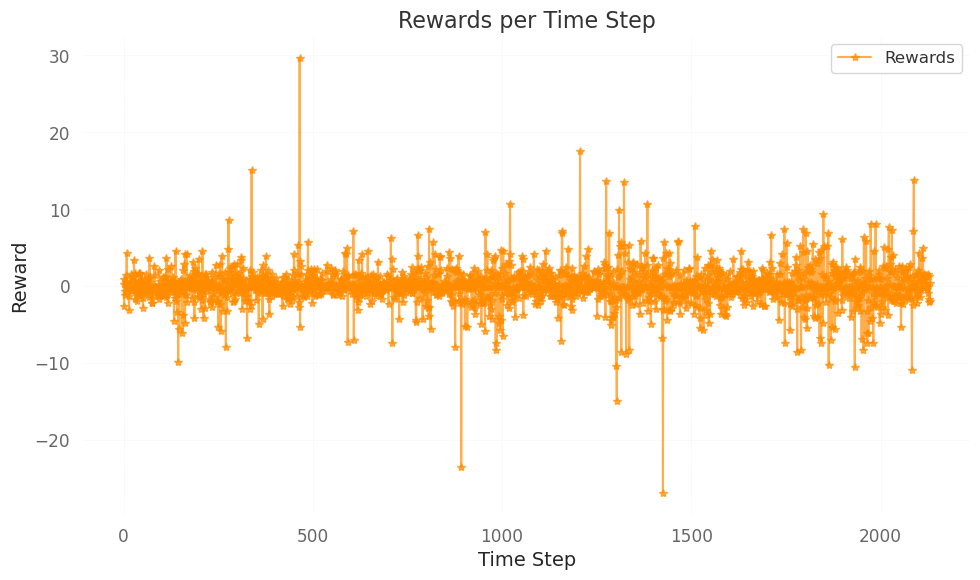

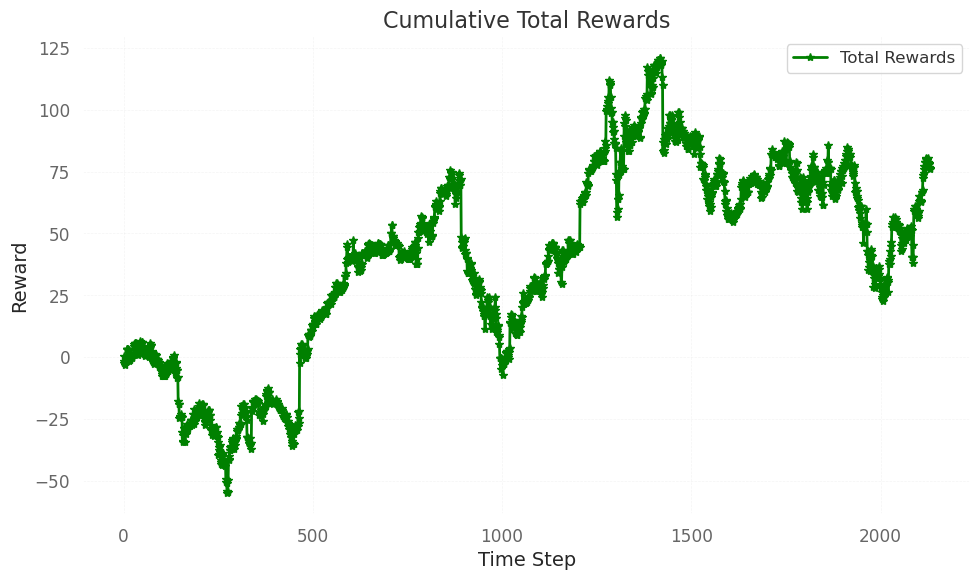

Total rewards: 76.52262983402449
Episode: 6/30, Score: <module 'time' (built-in)>, Epsilon: 0.97
Total return of portfolio: -100.00%


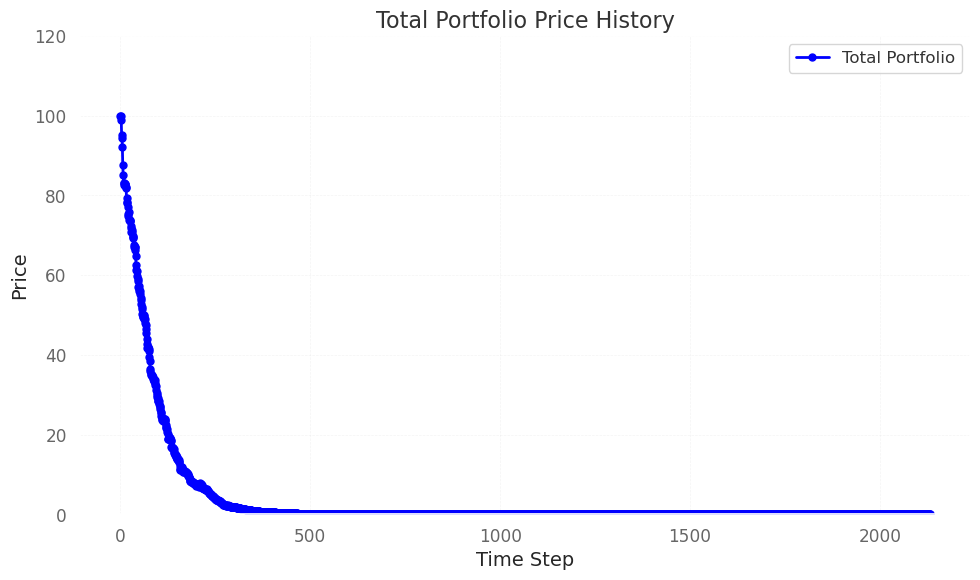

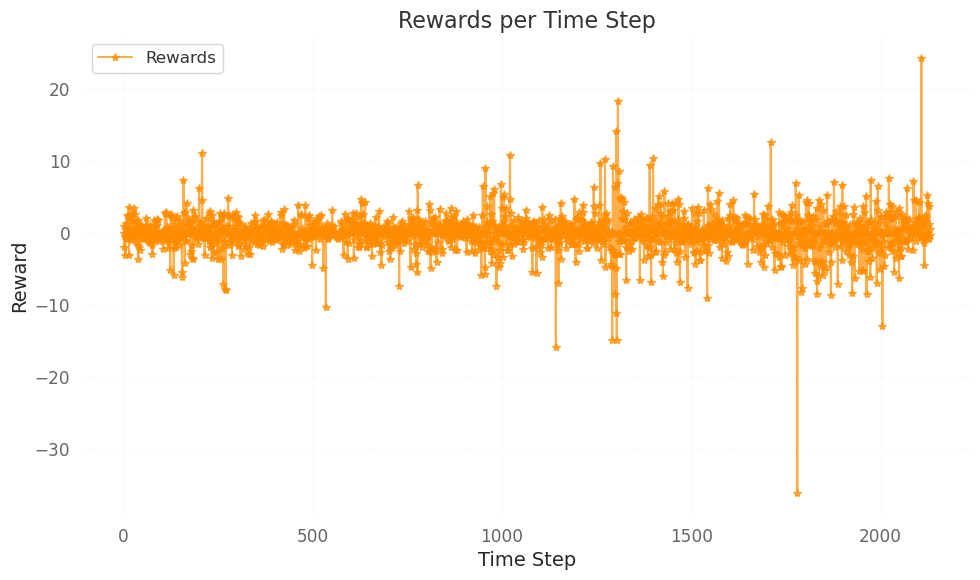

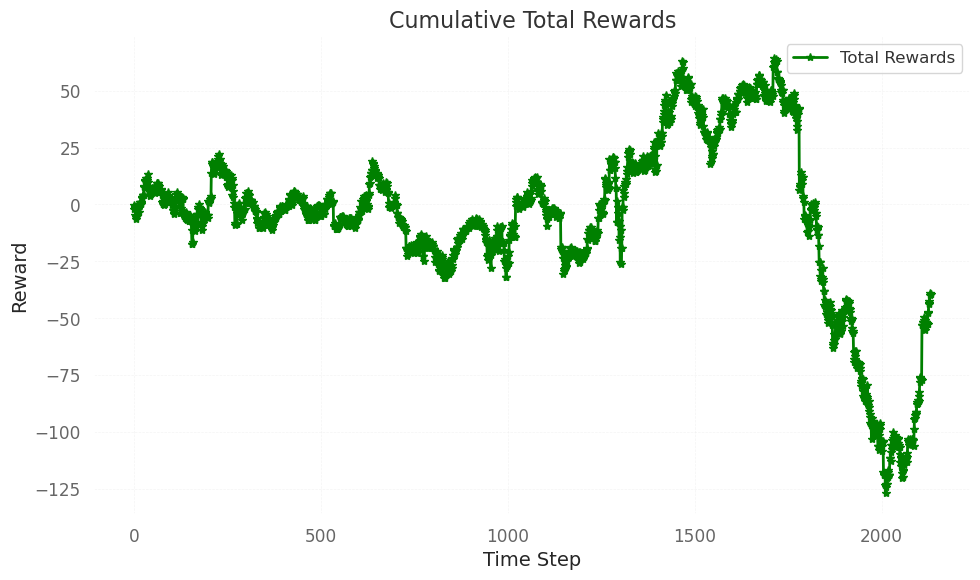

Total rewards: -39.44384781072771
Episode: 7/30, Score: <module 'time' (built-in)>, Epsilon: 0.97
Total return of portfolio: -100.00%


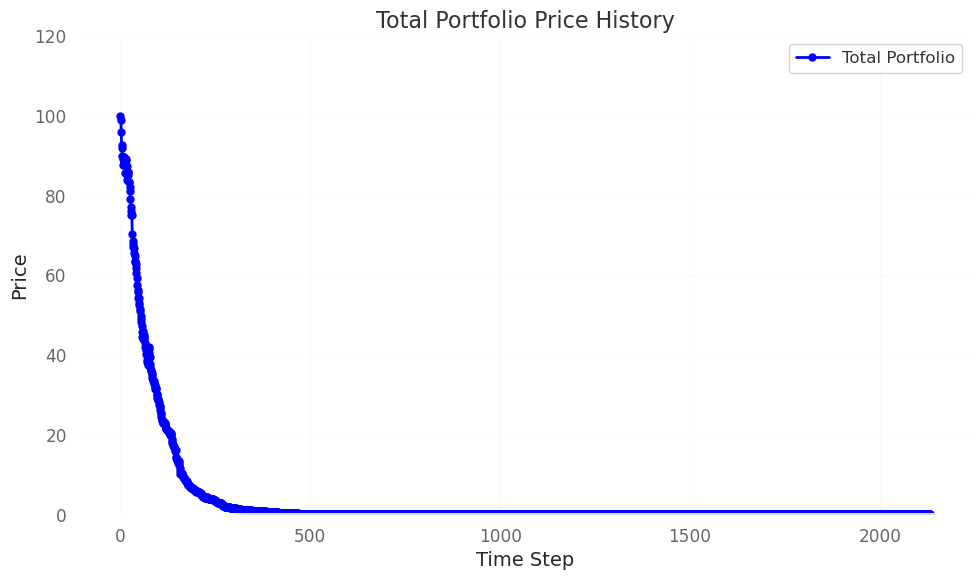

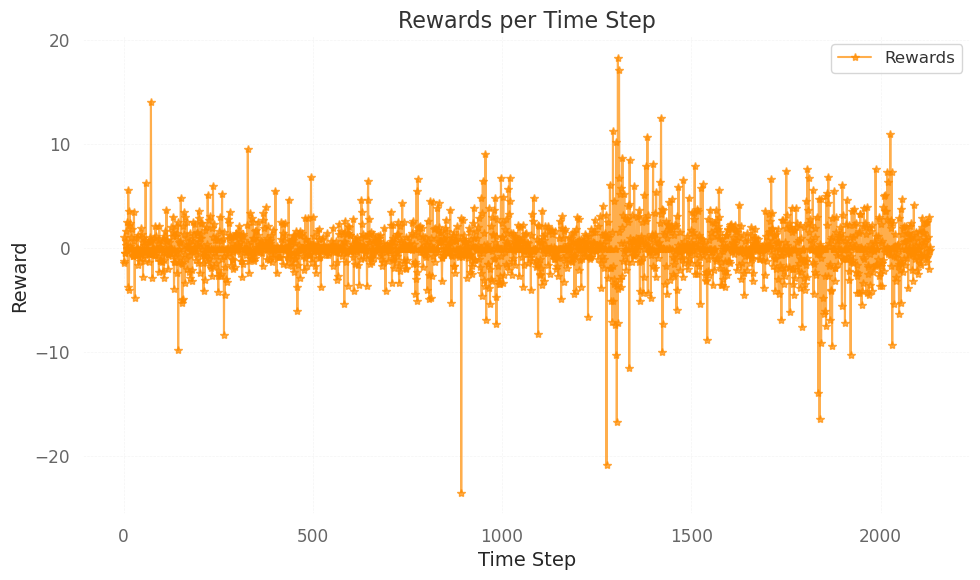

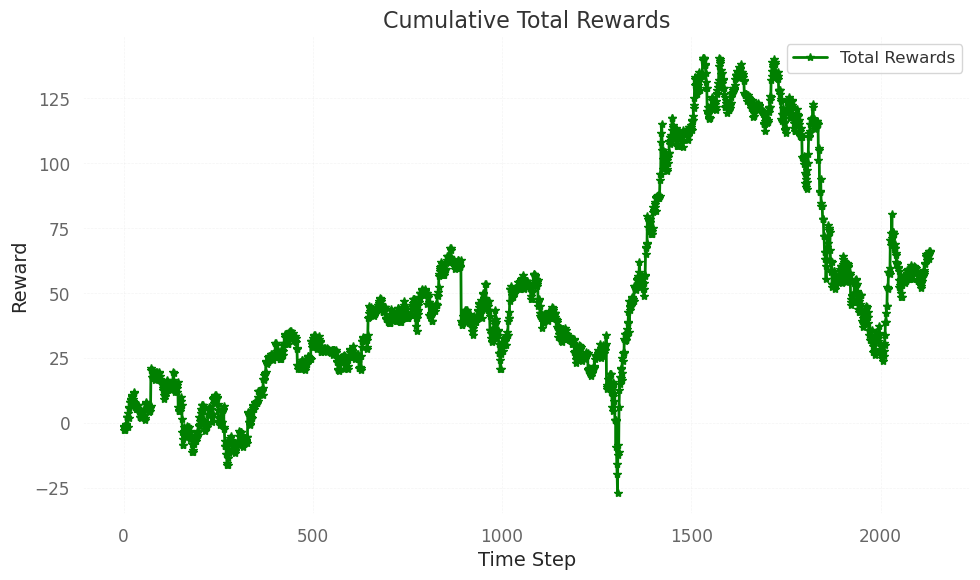

Total rewards: 66.04792040064083
Episode: 8/30, Score: <module 'time' (built-in)>, Epsilon: 0.96
Total return of portfolio: -100.00%


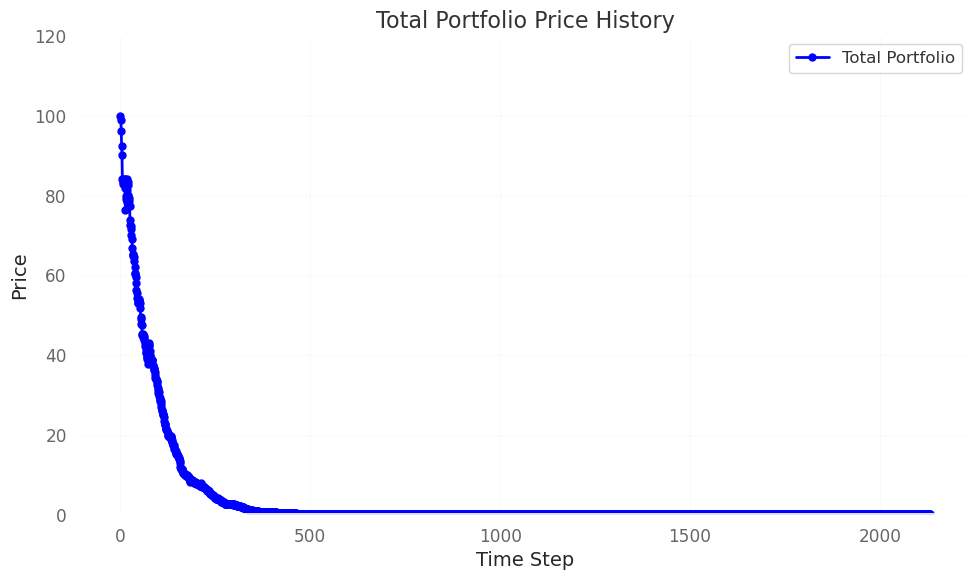

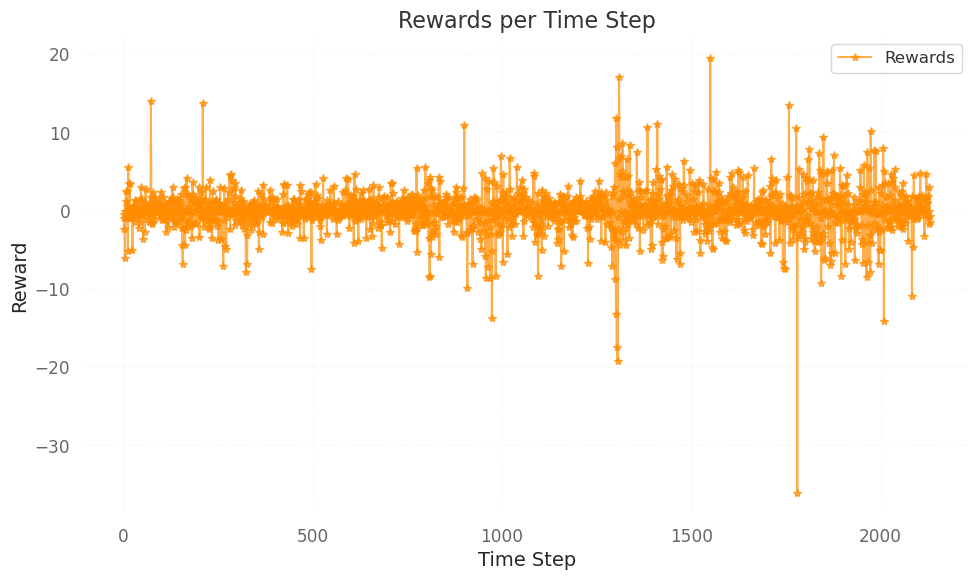

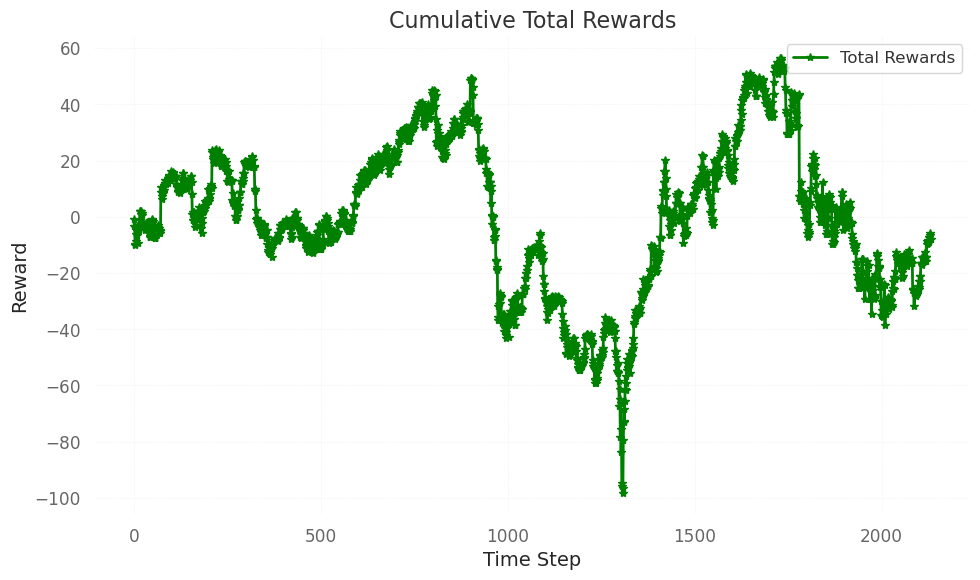

Total rewards: -8.07653715391793
Episode: 9/30, Score: <module 'time' (built-in)>, Epsilon: 0.96
Total return of portfolio: -100.00%


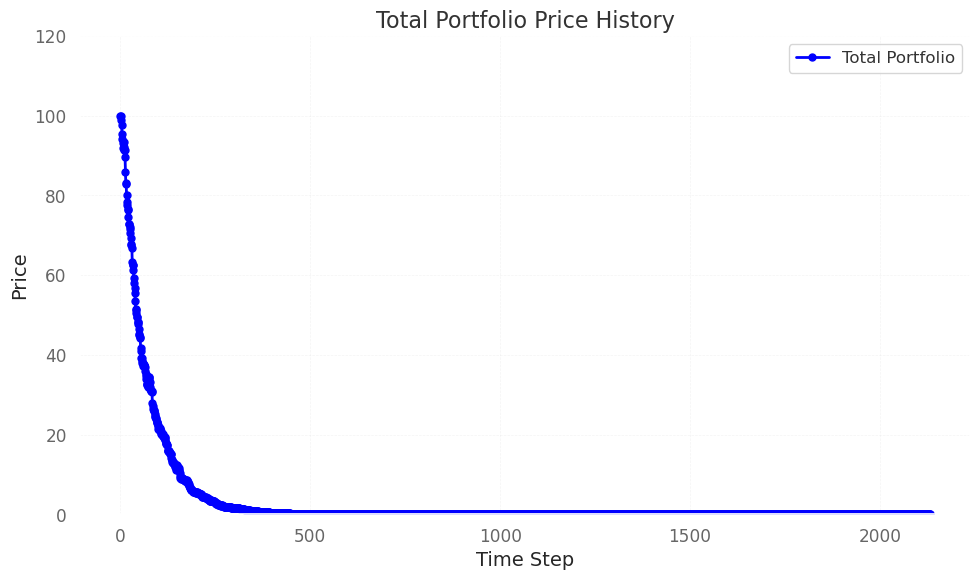

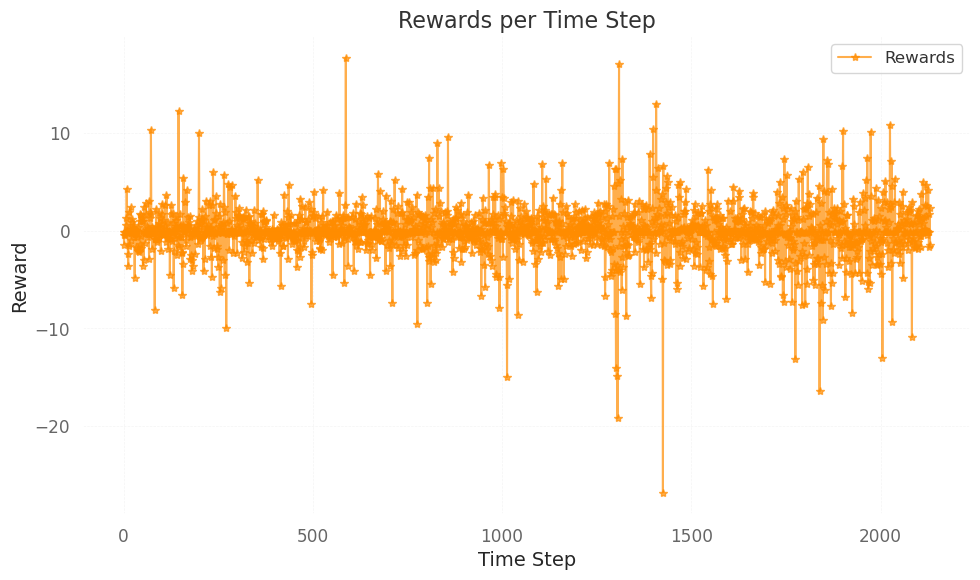

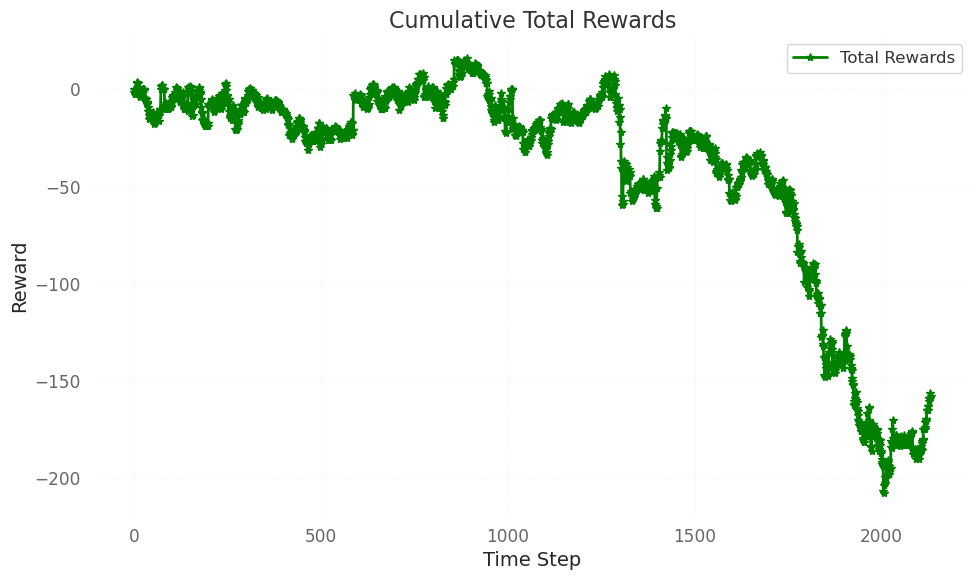

Total rewards: -158.0167778097039
Episode: 10/30, Score: <module 'time' (built-in)>, Epsilon: 0.95
Total return of portfolio: -100.00%


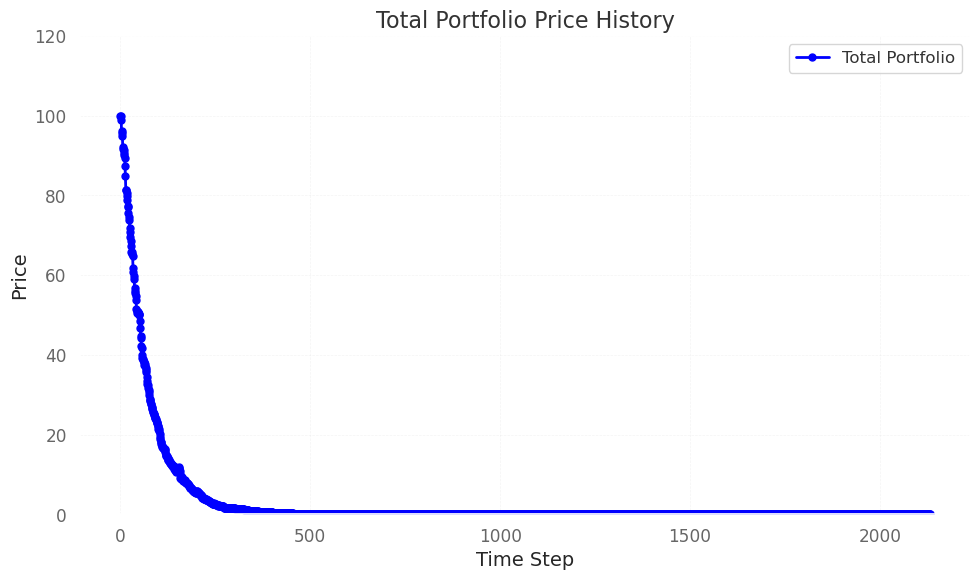

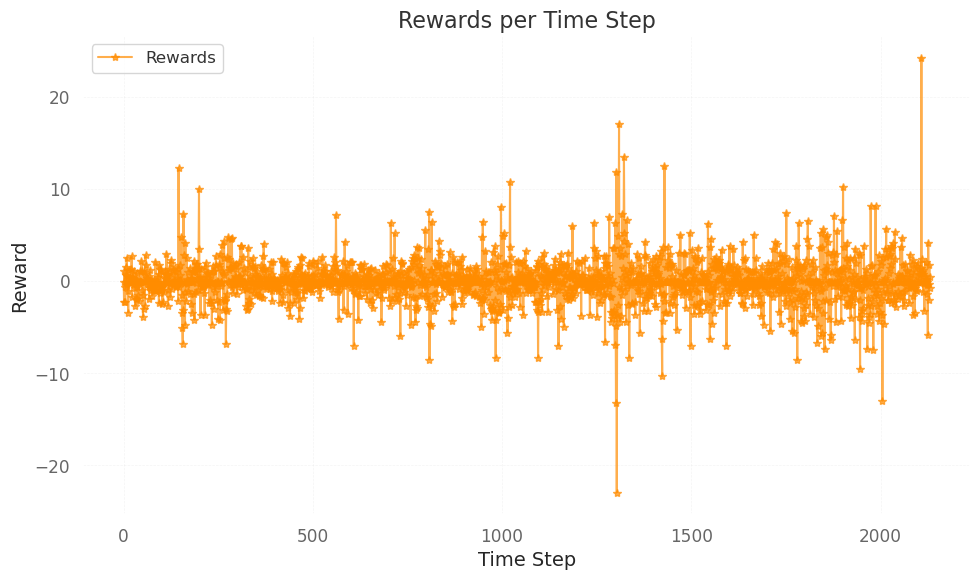

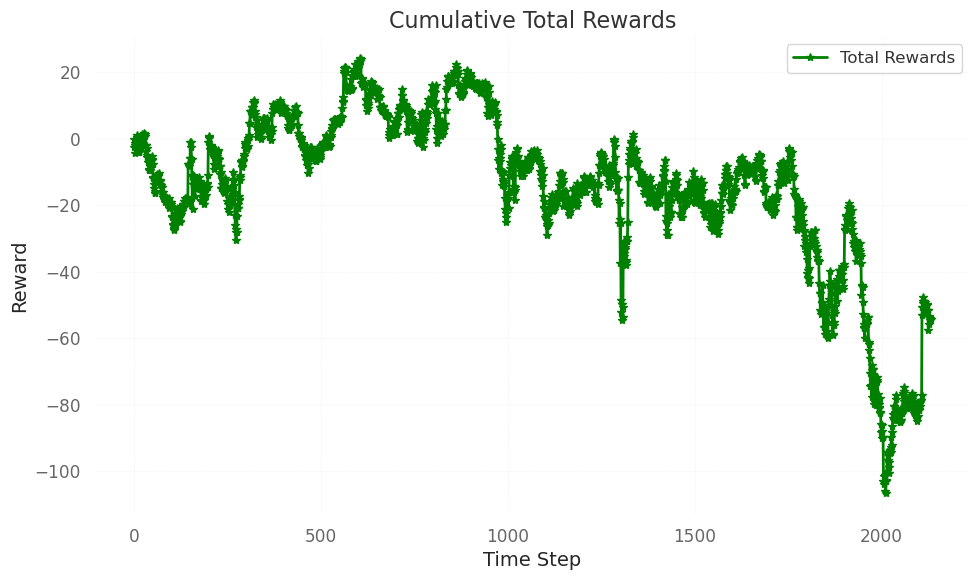

Total rewards: -54.33206727305499
Episode: 11/30, Score: <module 'time' (built-in)>, Epsilon: 0.95
Total return of portfolio: -100.00%


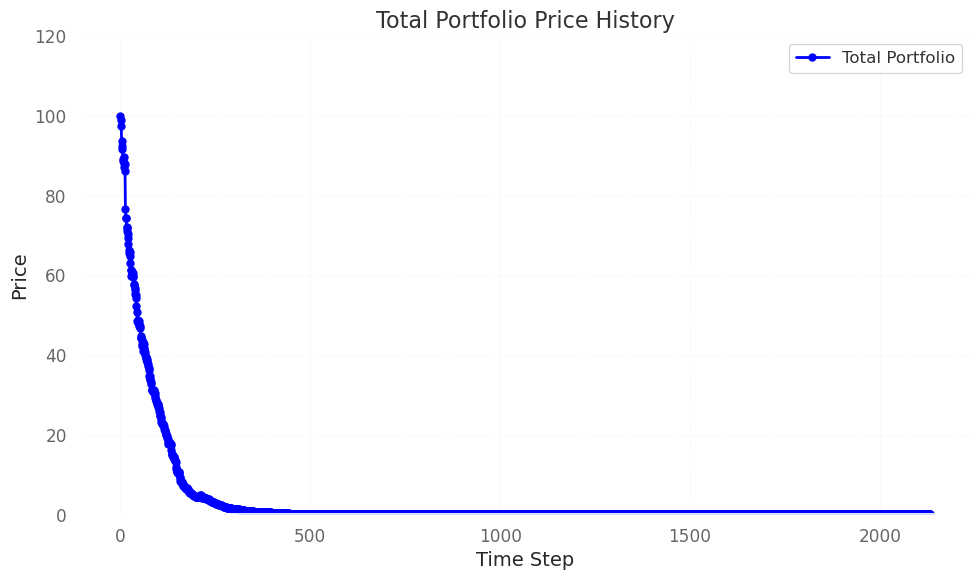

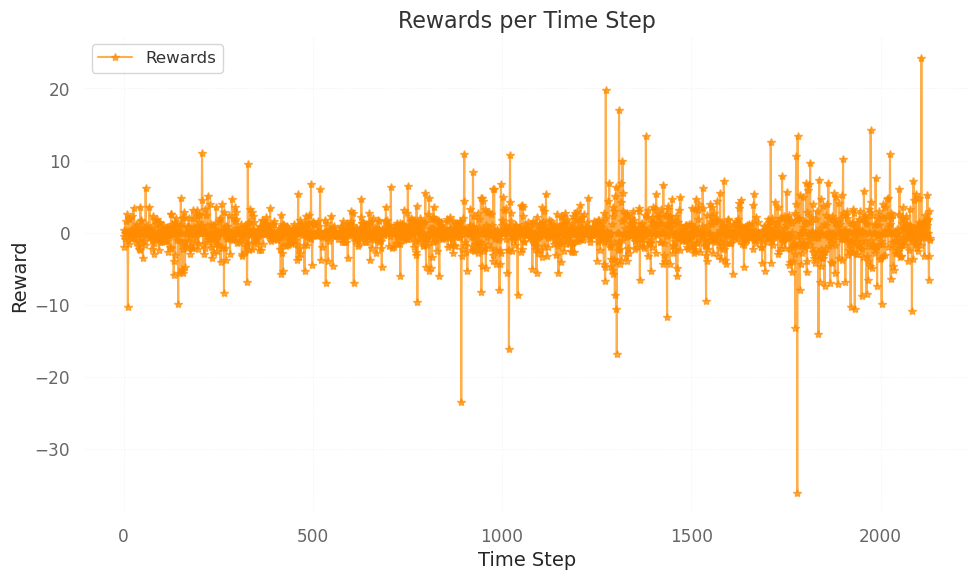

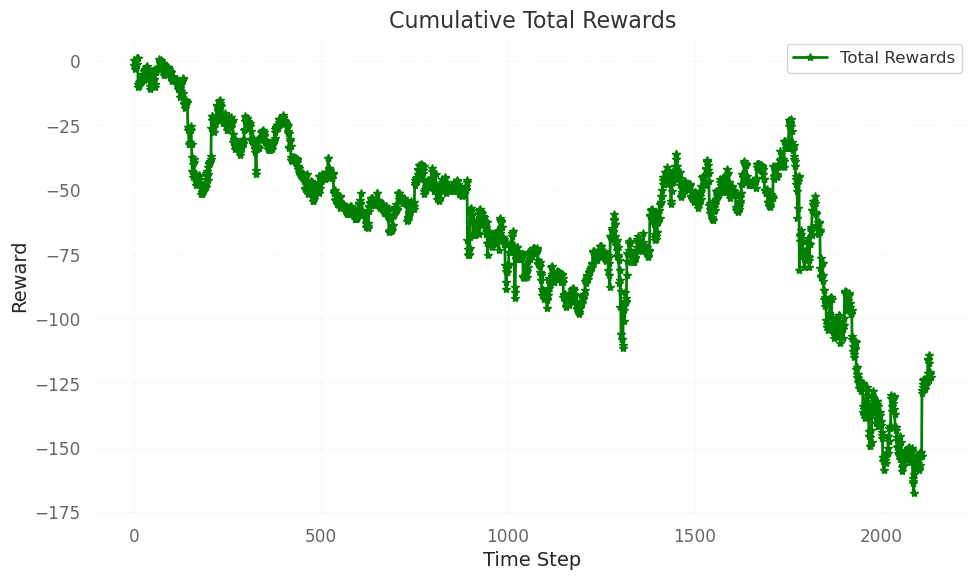

Total rewards: -122.53089659521905
Episode: 12/30, Score: <module 'time' (built-in)>, Epsilon: 0.94
Total return of portfolio: -100.00%


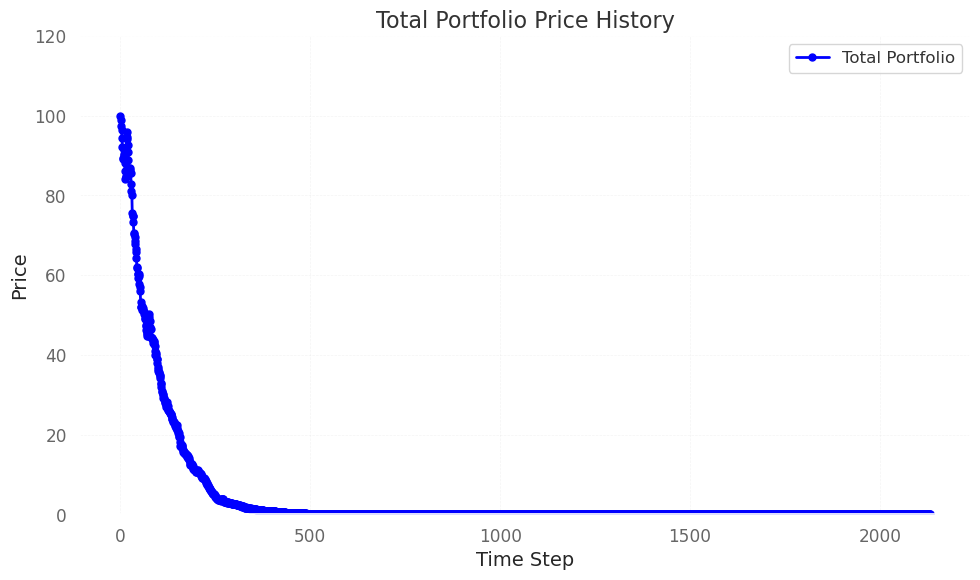

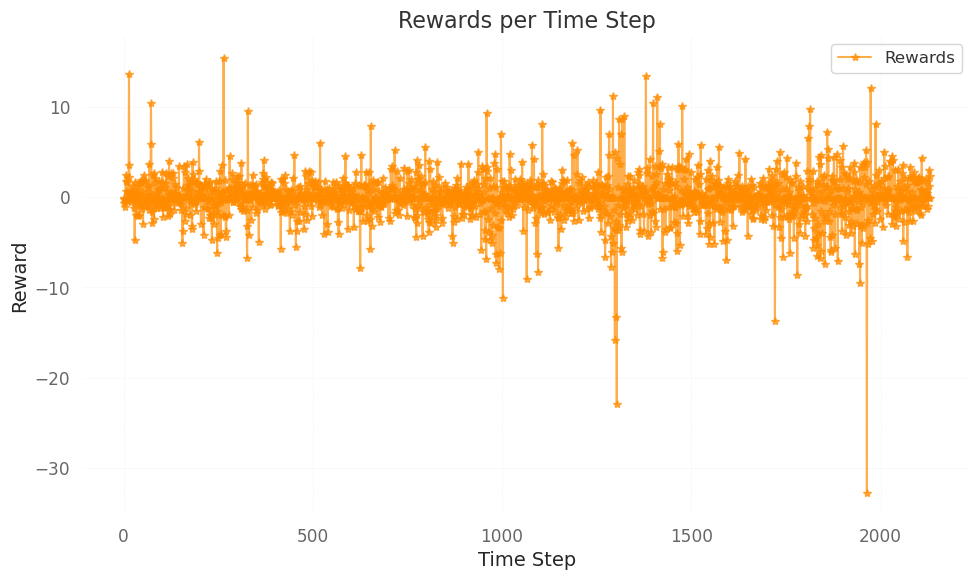

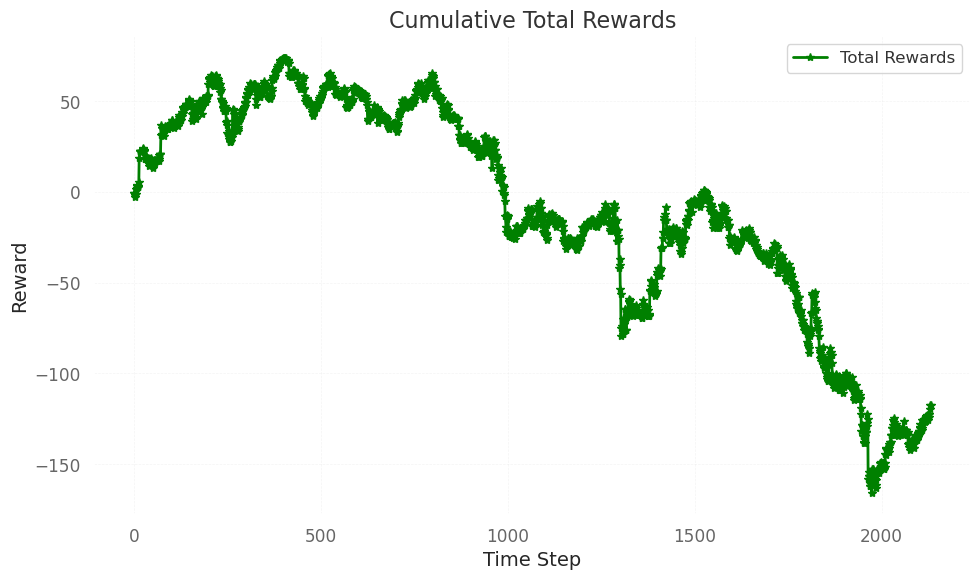

Total rewards: -117.42938008961761
Episode: 13/30, Score: <module 'time' (built-in)>, Epsilon: 0.94
Total return of portfolio: -100.00%


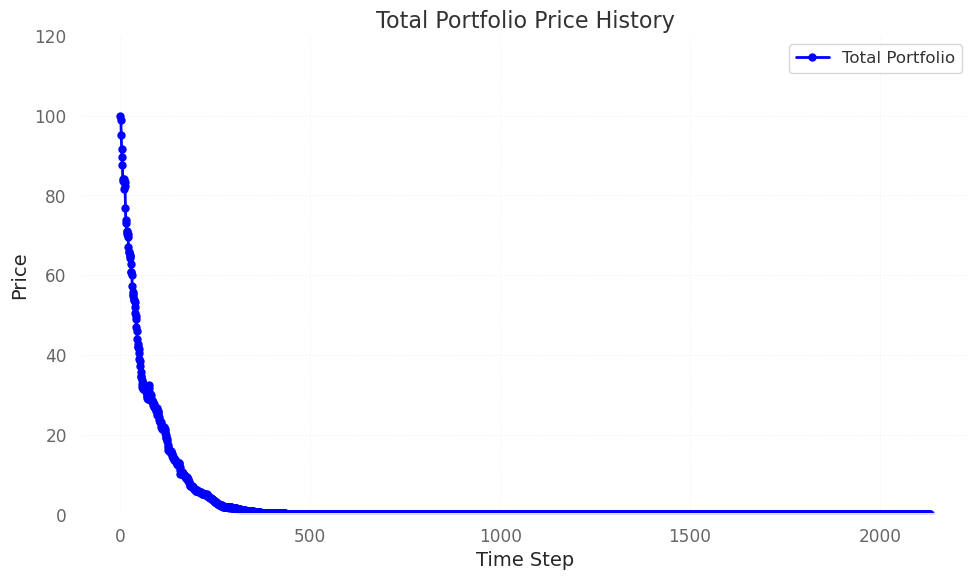

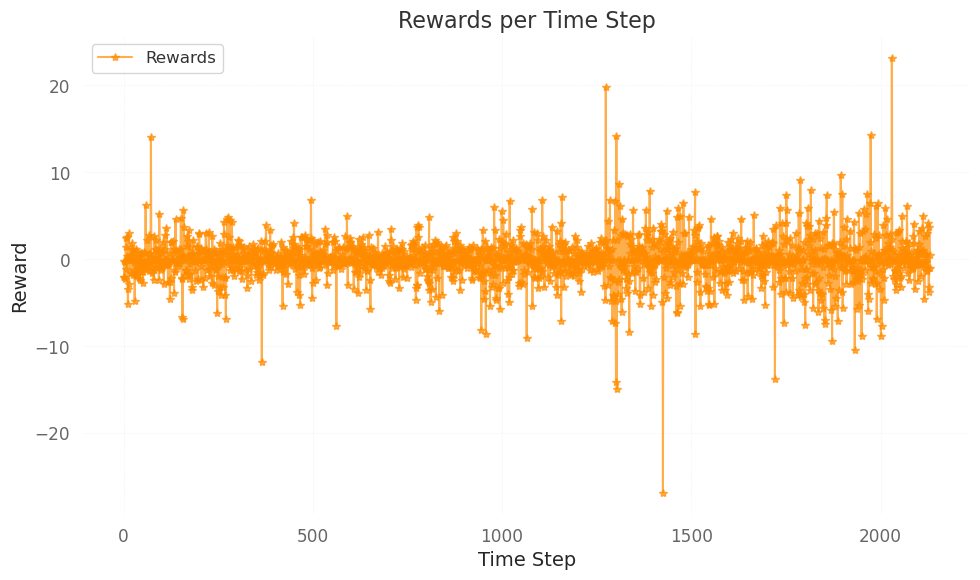

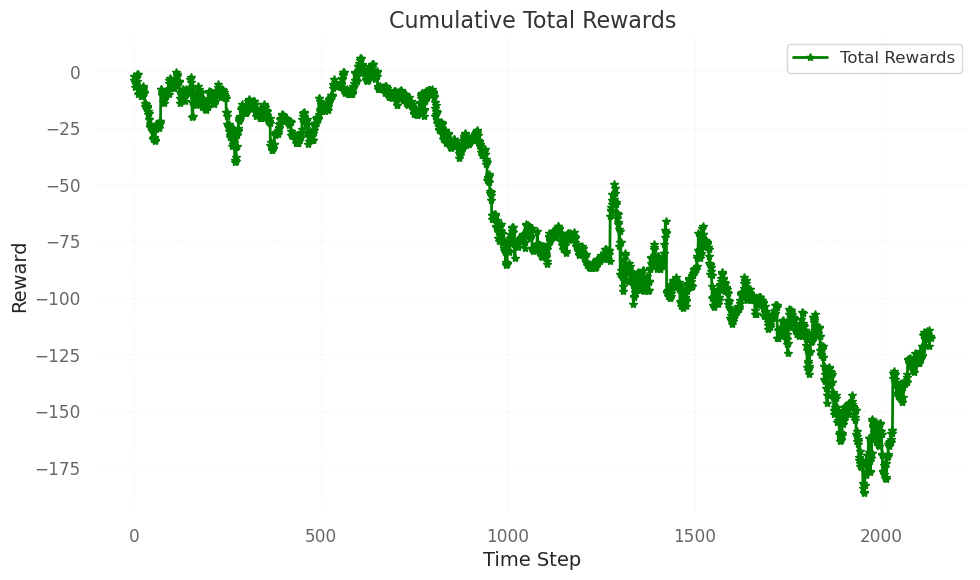

Total rewards: -117.9534227817765
Episode: 14/30, Score: <module 'time' (built-in)>, Epsilon: 0.93
Total return of portfolio: -100.00%


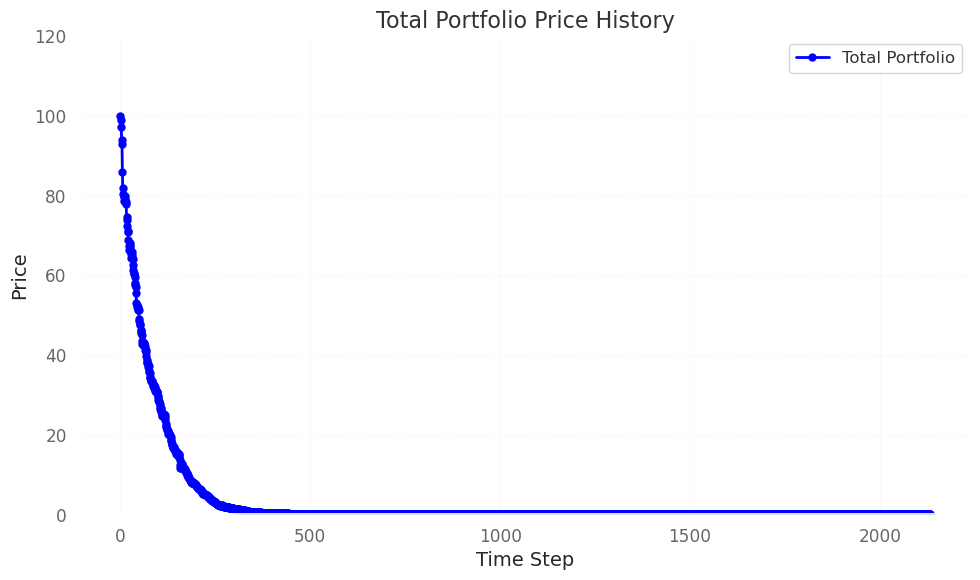

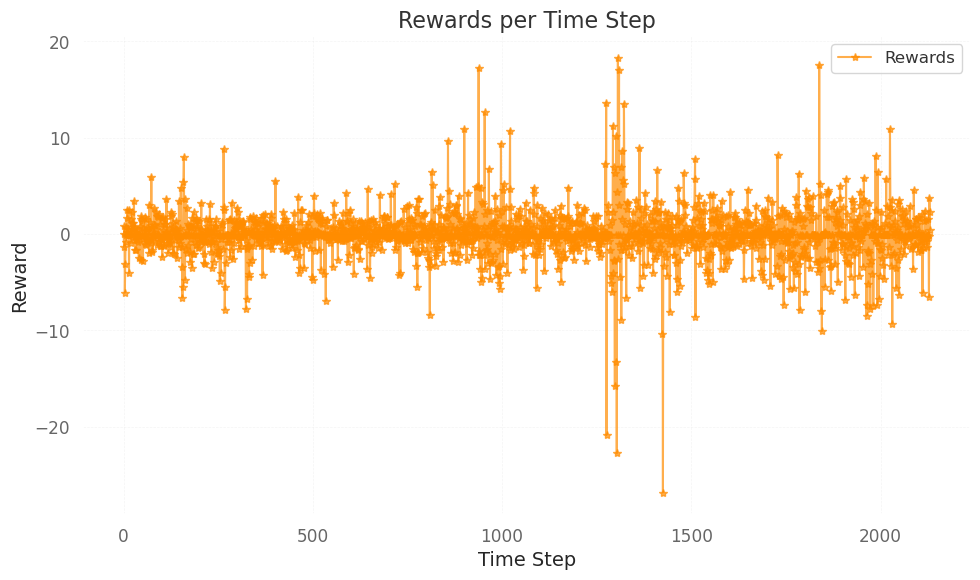

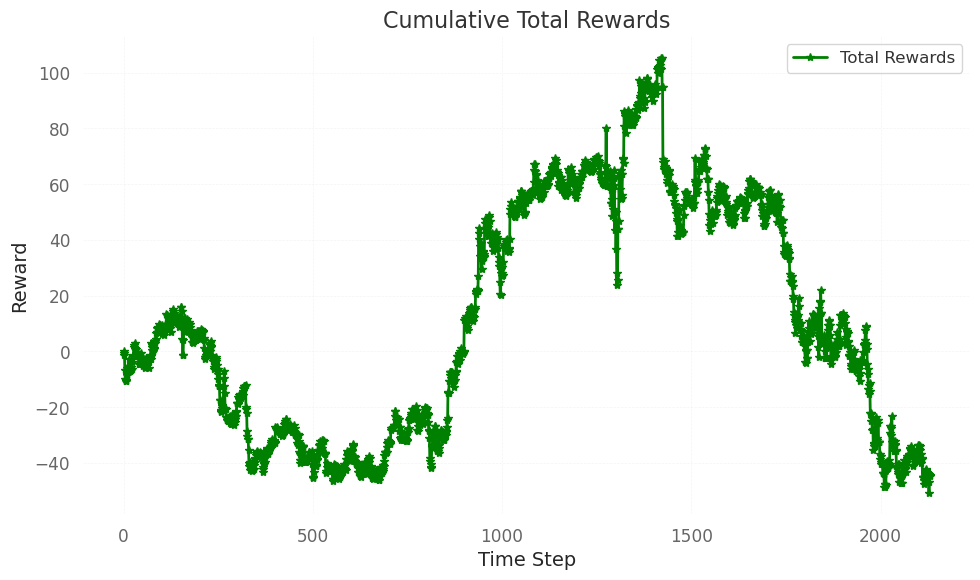

Total rewards: -44.236451294169406
Episode: 15/30, Score: <module 'time' (built-in)>, Epsilon: 0.93
Total return of portfolio: -100.00%


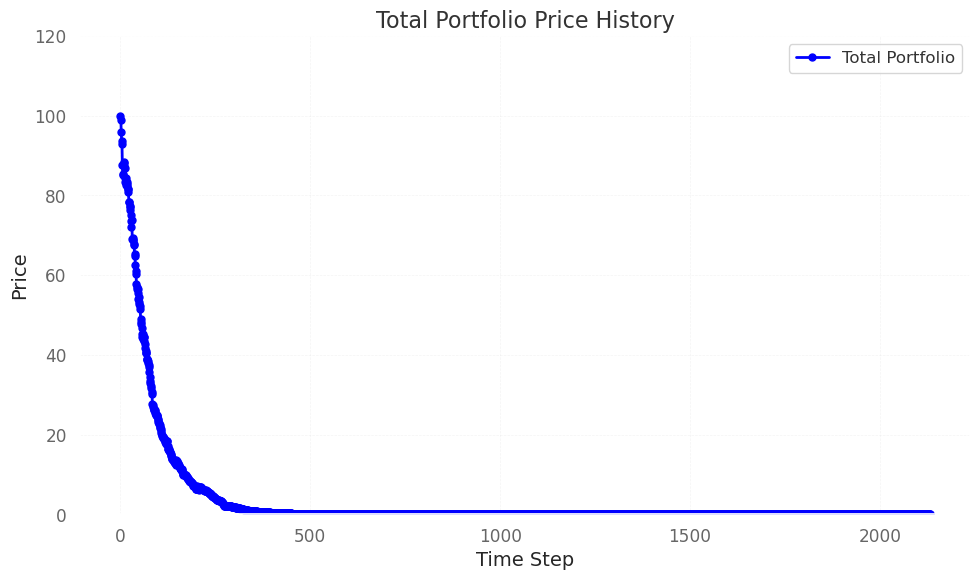

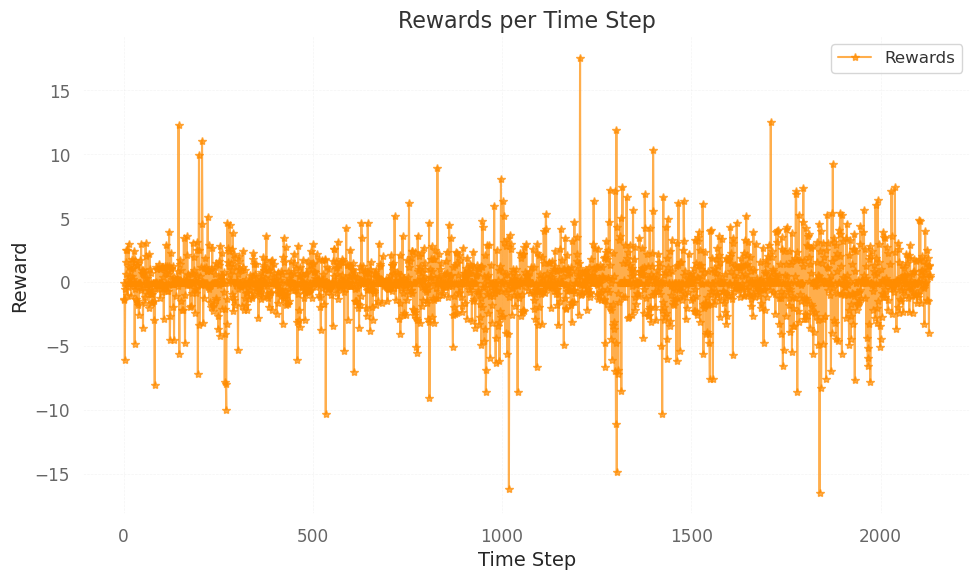

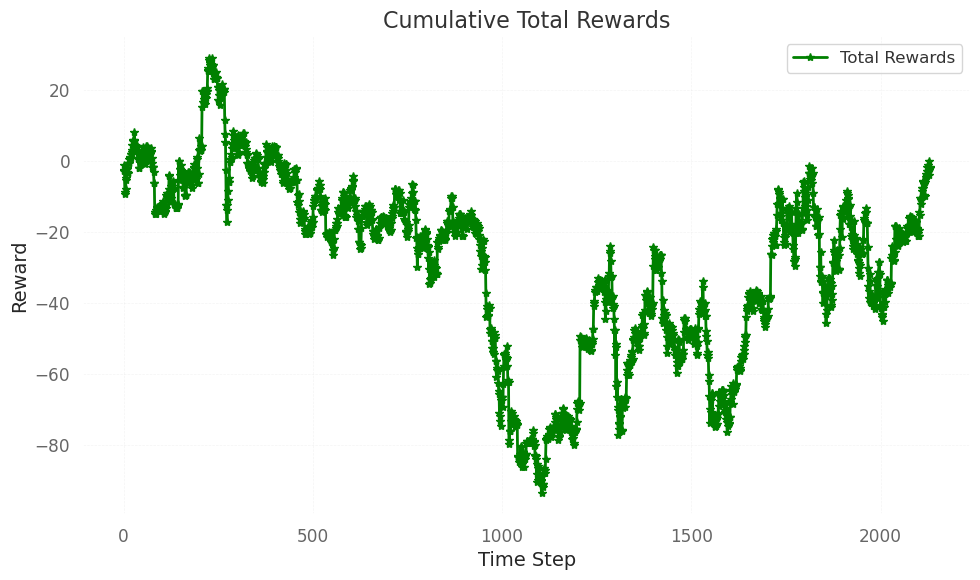

Total rewards: -1.6416857208615212
Episode: 16/30, Score: <module 'time' (built-in)>, Epsilon: 0.92
Total return of portfolio: -100.00%


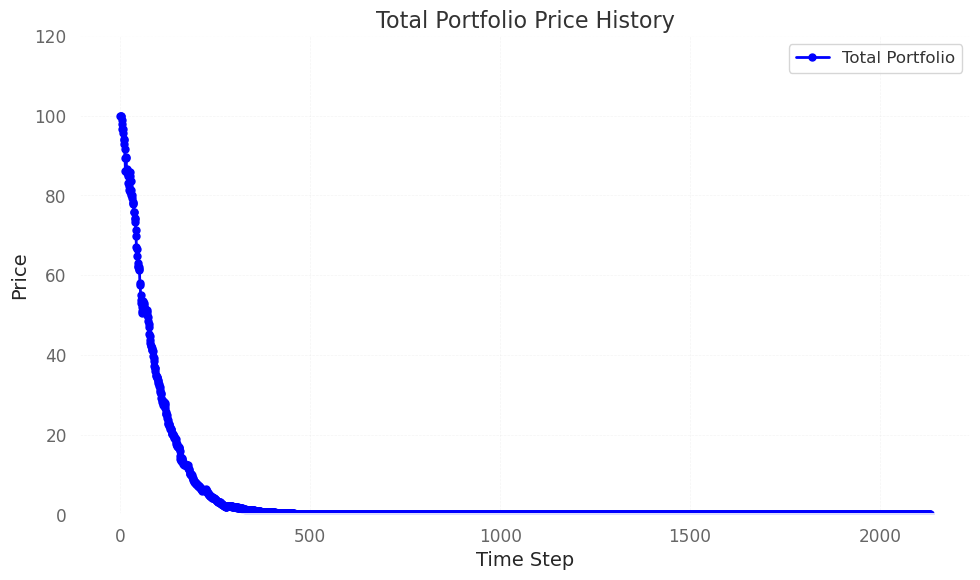

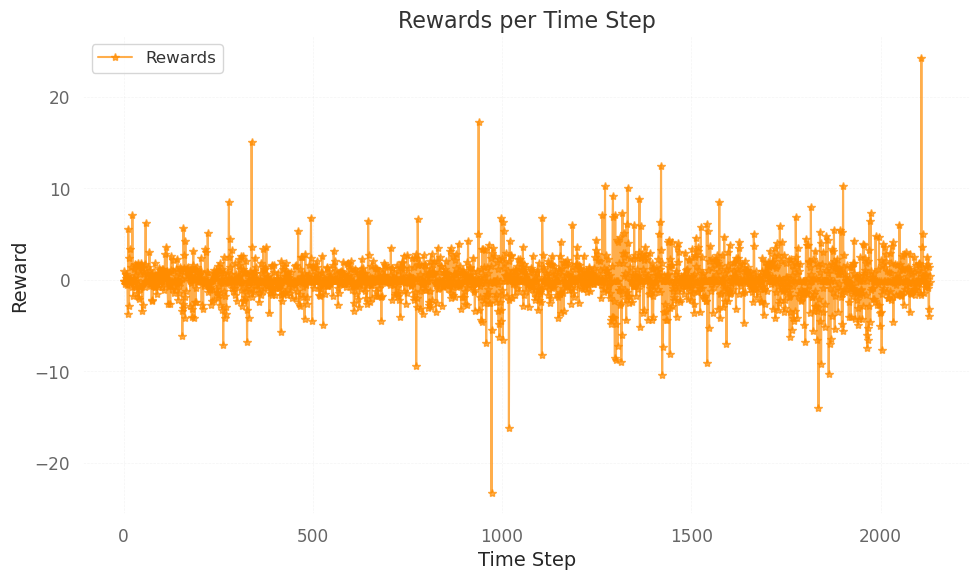

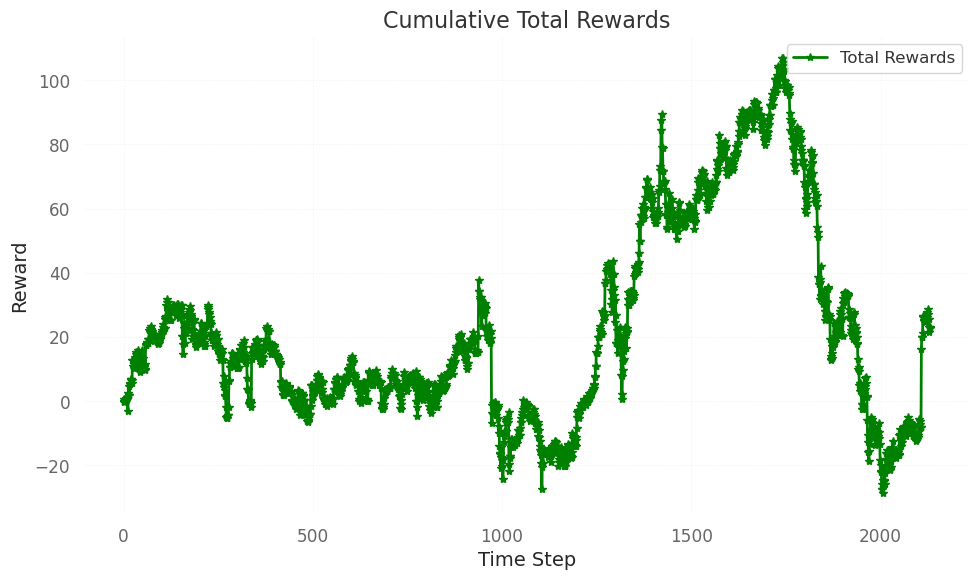

Total rewards: 23.196170176368778


2024-12-19 20:08:11.429681: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


Episode: 17/30, Score: <module 'time' (built-in)>, Epsilon: 0.92
Total return of portfolio: -100.00%


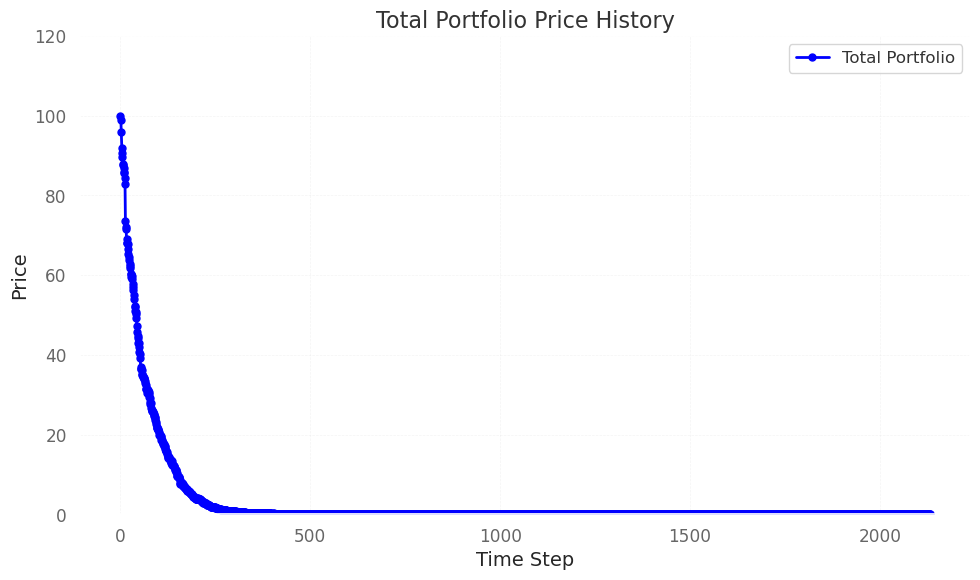

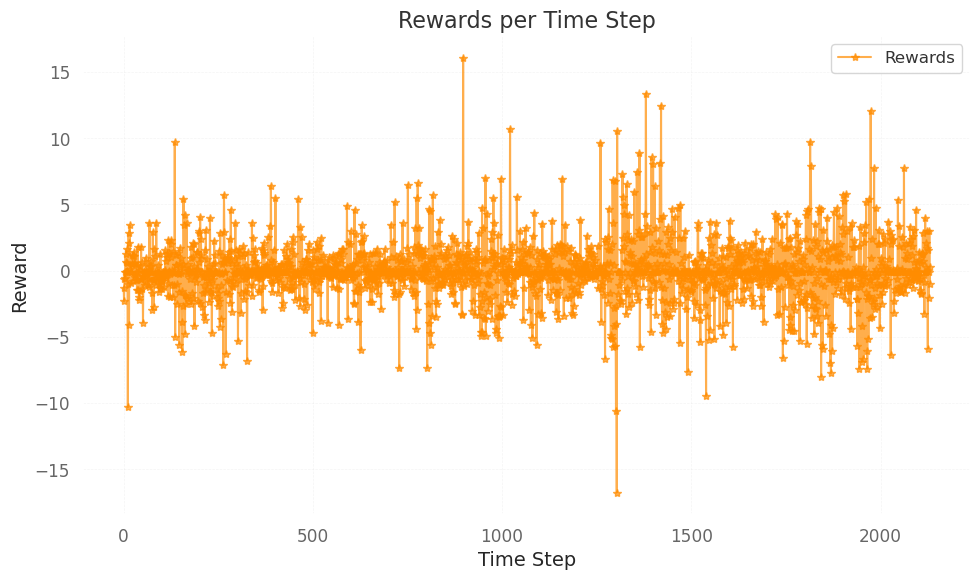

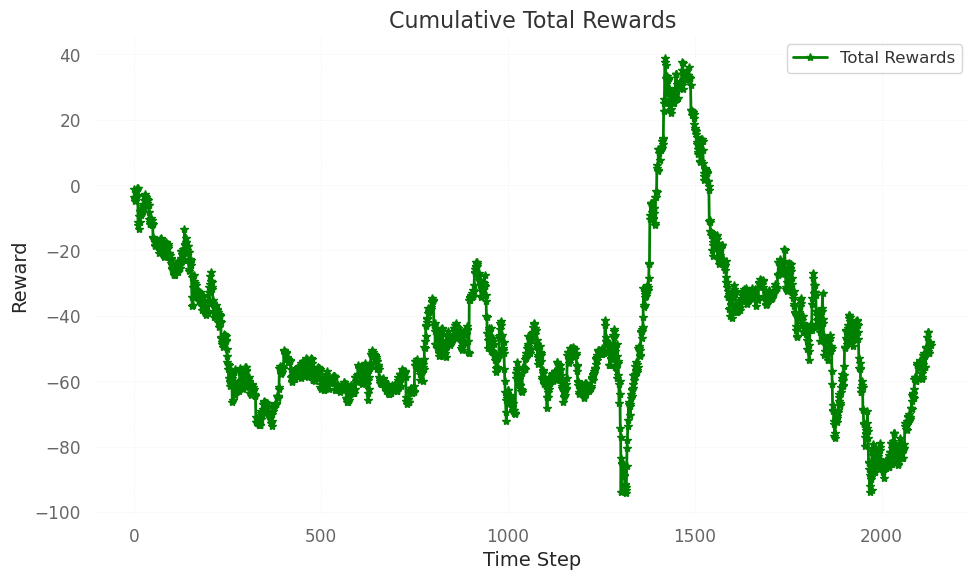

Total rewards: -49.08060667219494
Episode: 18/30, Score: <module 'time' (built-in)>, Epsilon: 0.91
Total return of portfolio: -100.00%


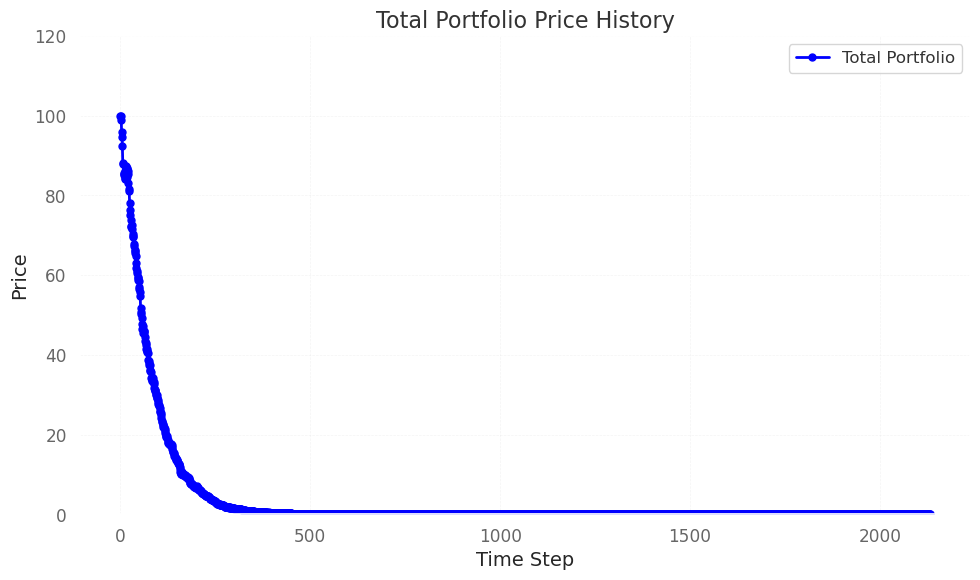

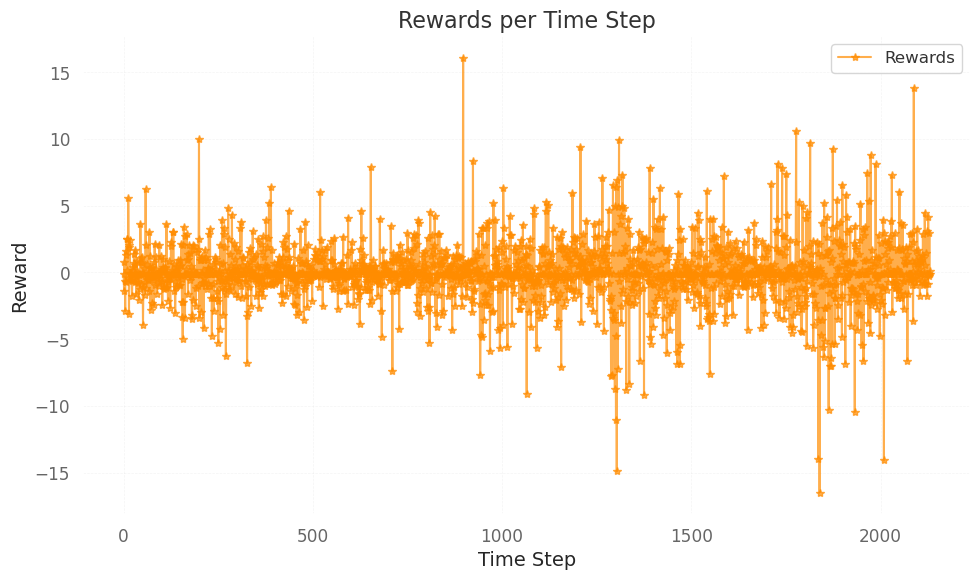

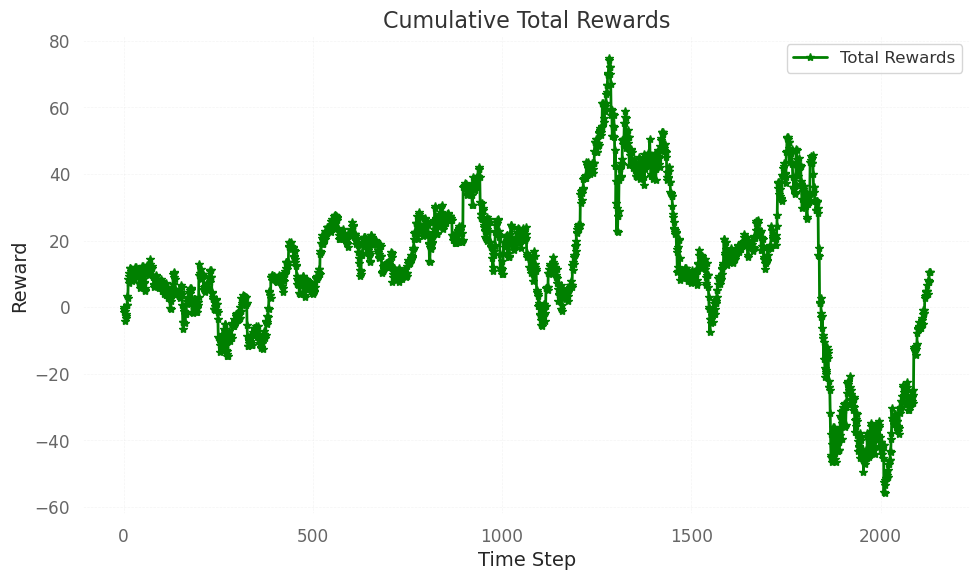

Total rewards: 10.60582849648933
Episode: 19/30, Score: <module 'time' (built-in)>, Epsilon: 0.91
Total return of portfolio: -100.00%


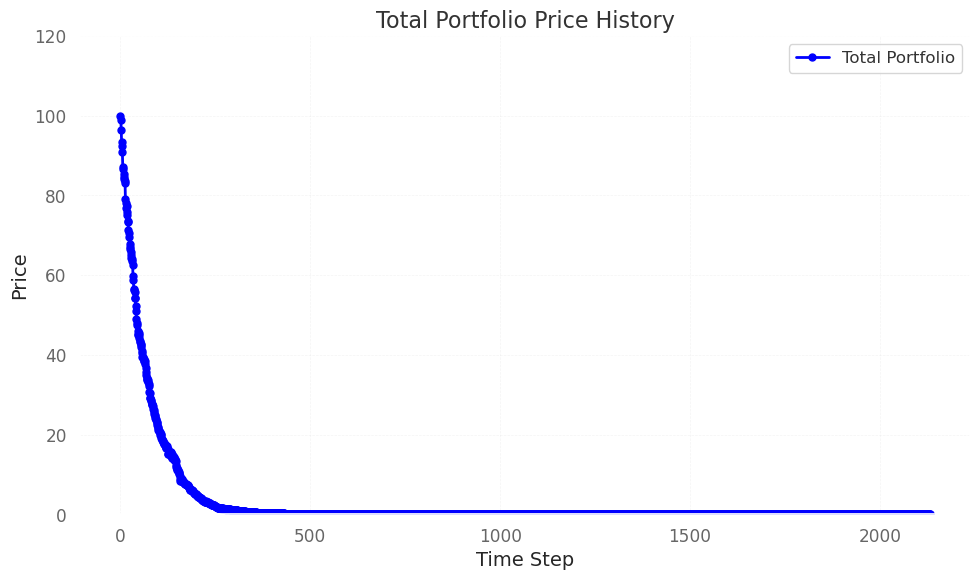

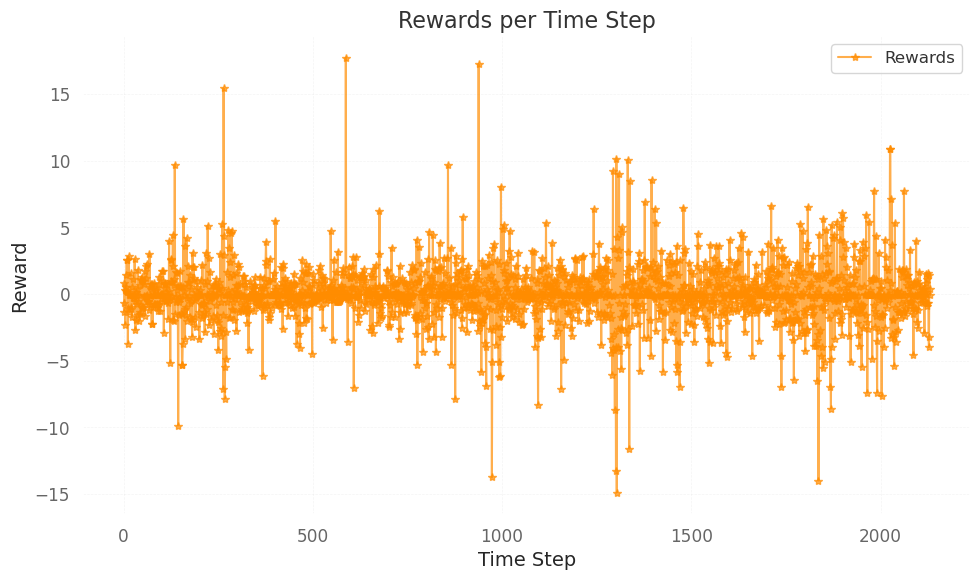

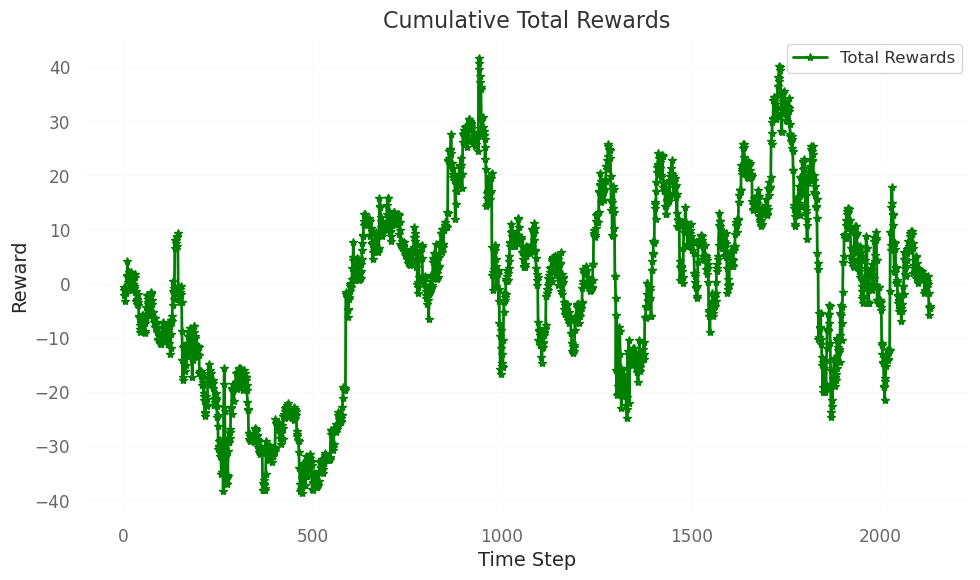

Total rewards: -4.091732527939544
Episode: 20/30, Score: <module 'time' (built-in)>, Epsilon: 0.90
Total return of portfolio: -100.00%


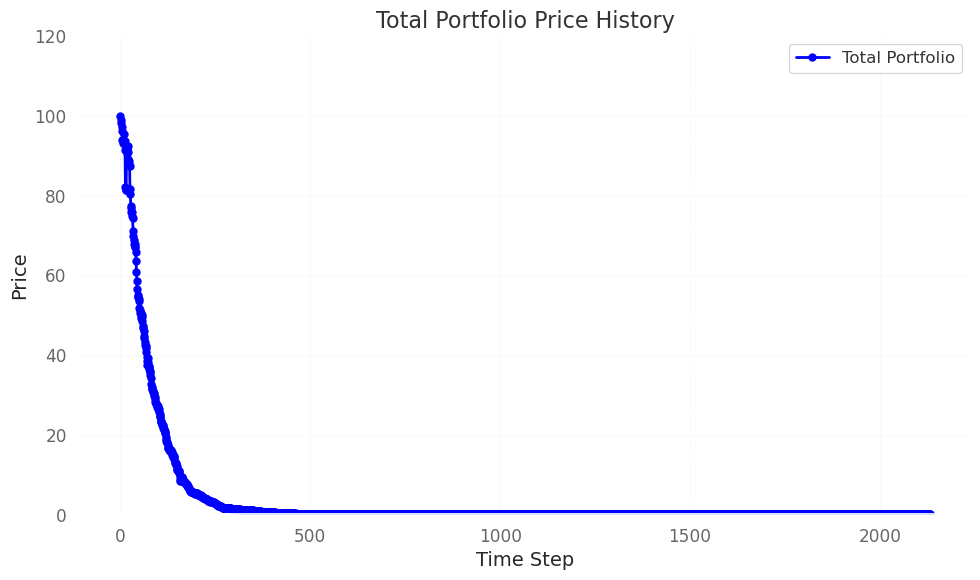

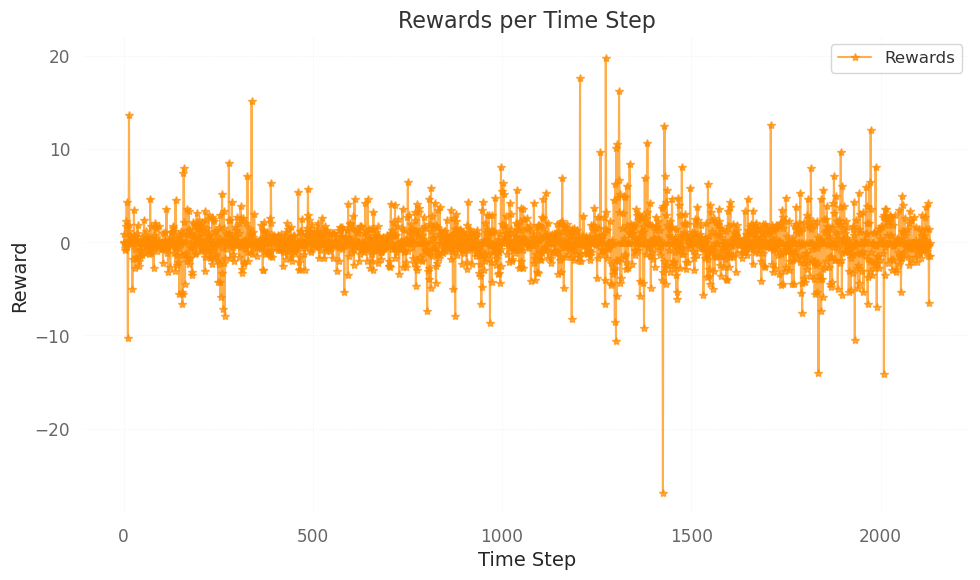

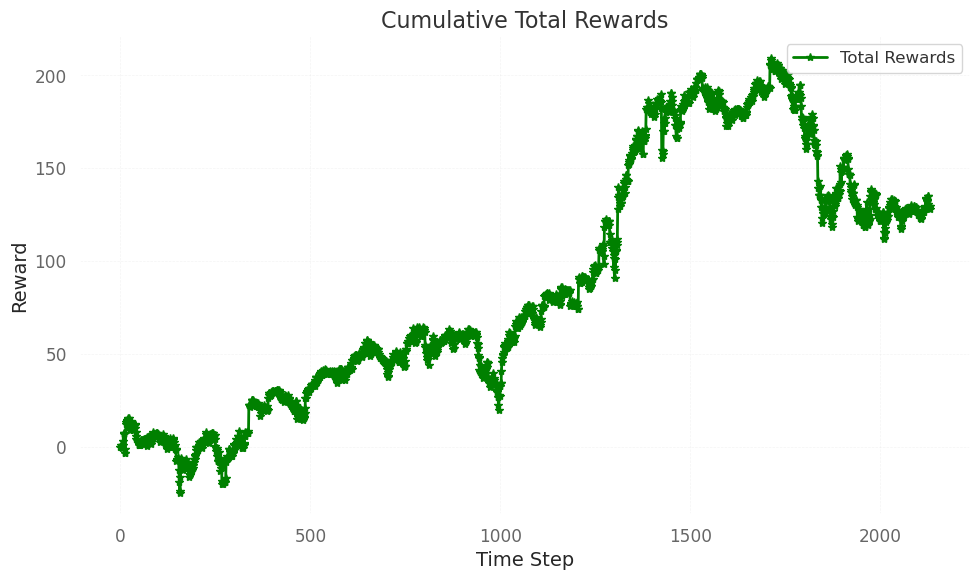

Total rewards: 128.11460474509937
Episode: 21/30, Score: <module 'time' (built-in)>, Epsilon: 0.90
Total return of portfolio: -100.00%


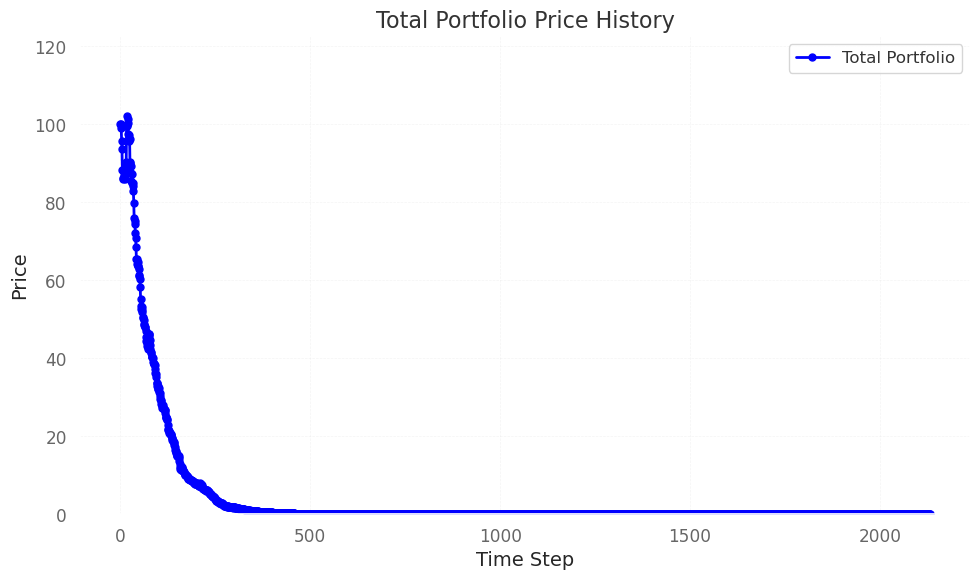

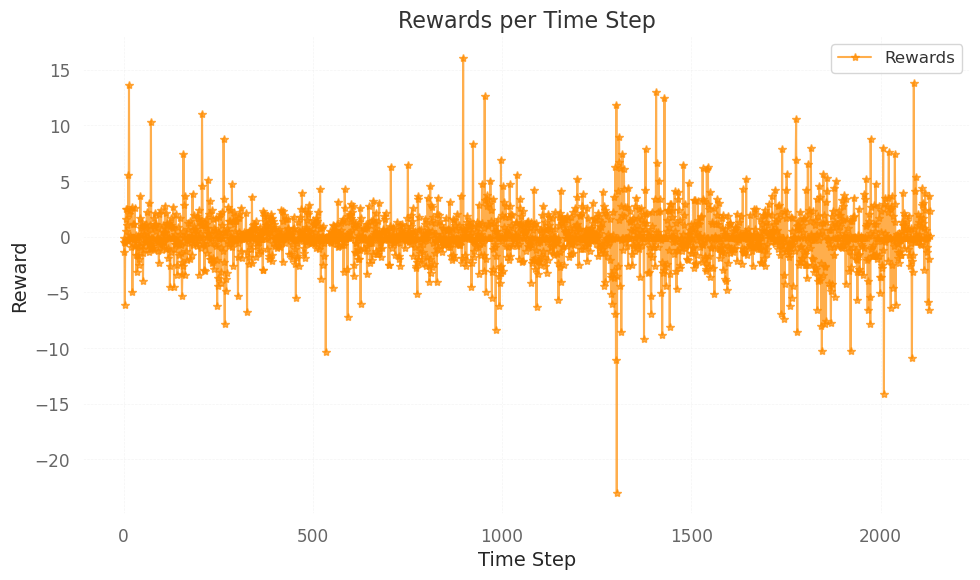

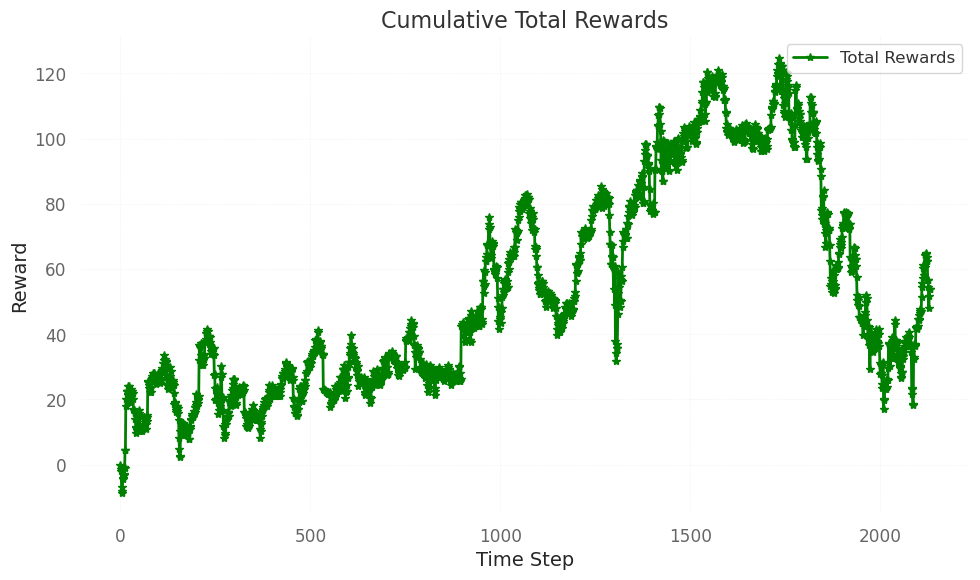

Total rewards: 54.01281893284288
Episode: 22/30, Score: <module 'time' (built-in)>, Epsilon: 0.90
Total return of portfolio: -100.00%


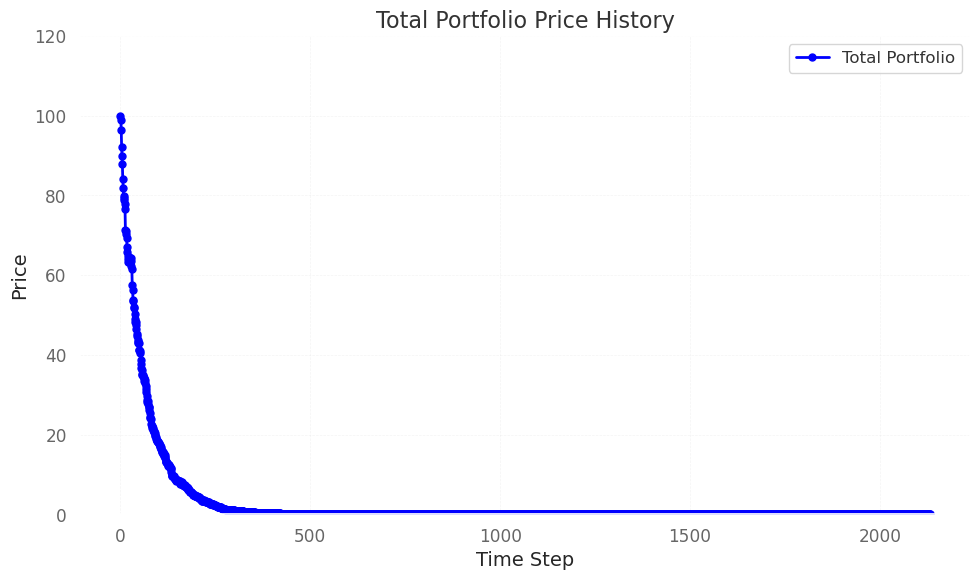

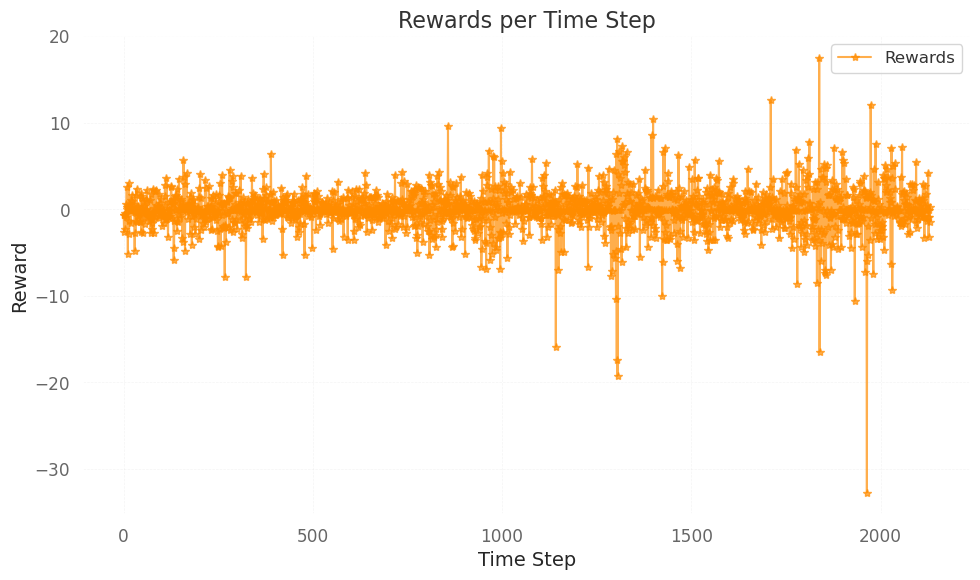

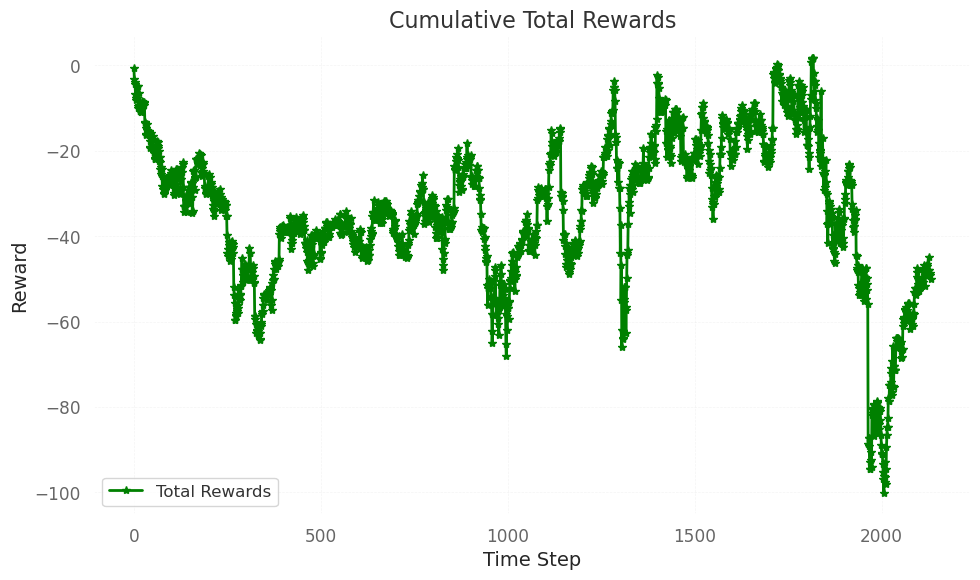

Total rewards: -50.14510606518333
Episode: 23/30, Score: <module 'time' (built-in)>, Epsilon: 0.89
Total return of portfolio: -100.00%


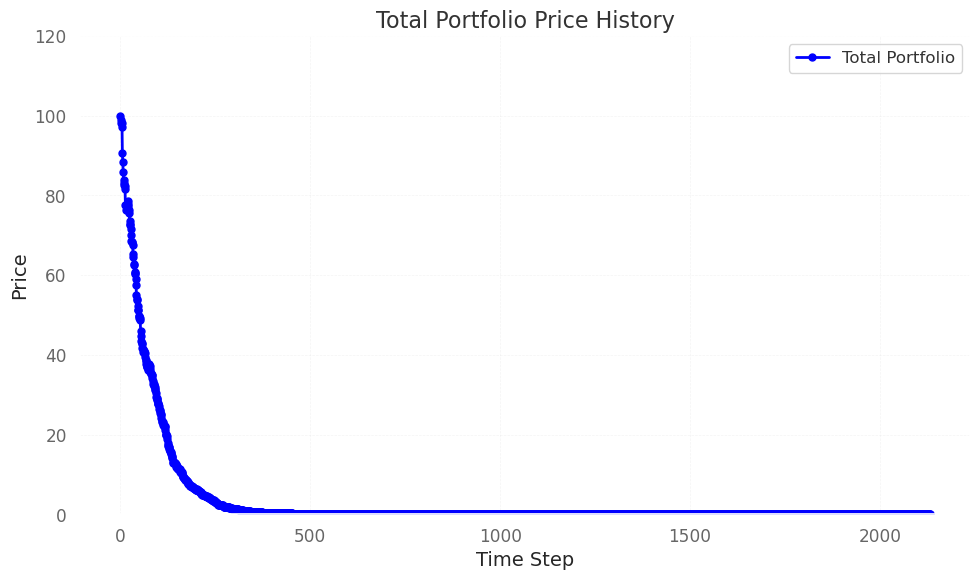

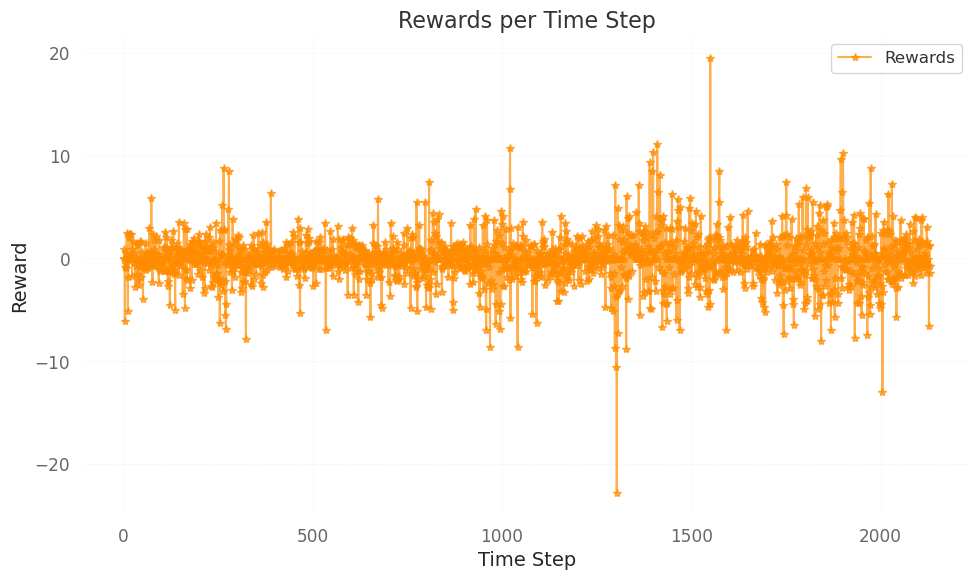

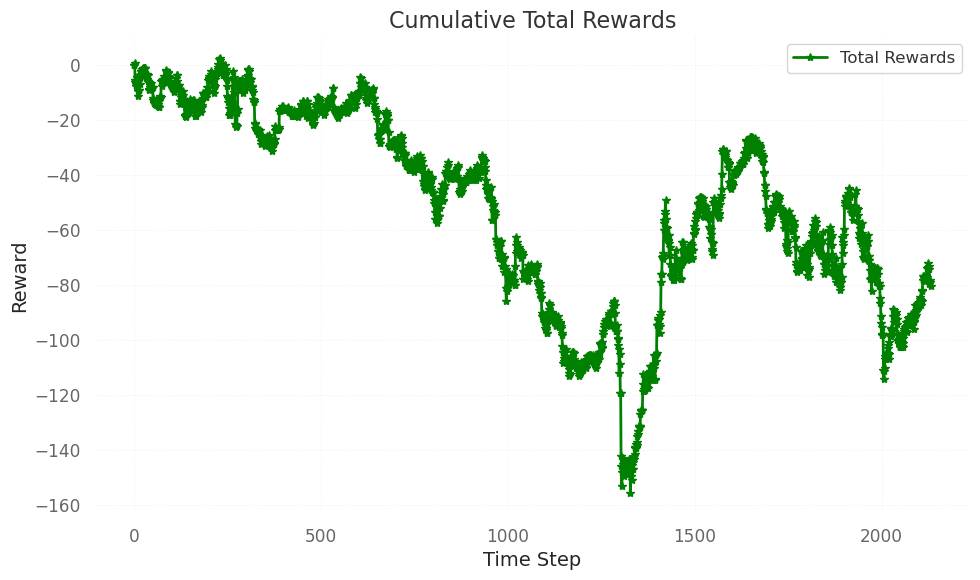

Total rewards: -80.45821126675682
Episode: 24/30, Score: <module 'time' (built-in)>, Epsilon: 0.89
Total return of portfolio: -100.00%


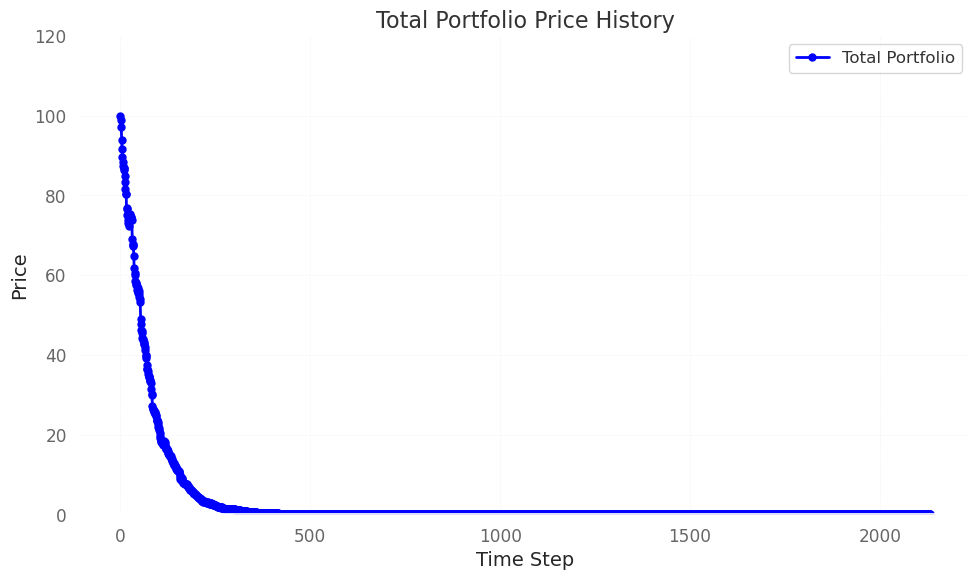

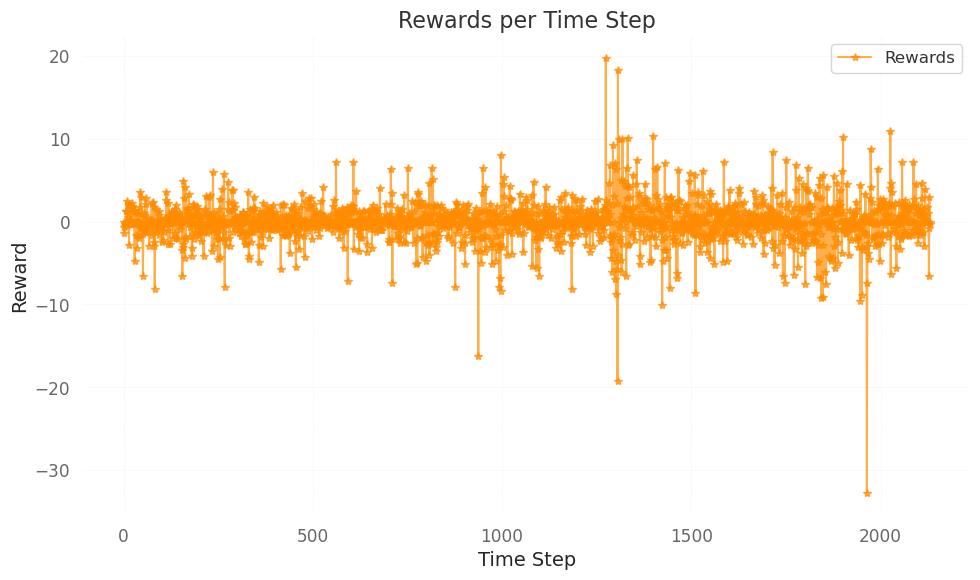

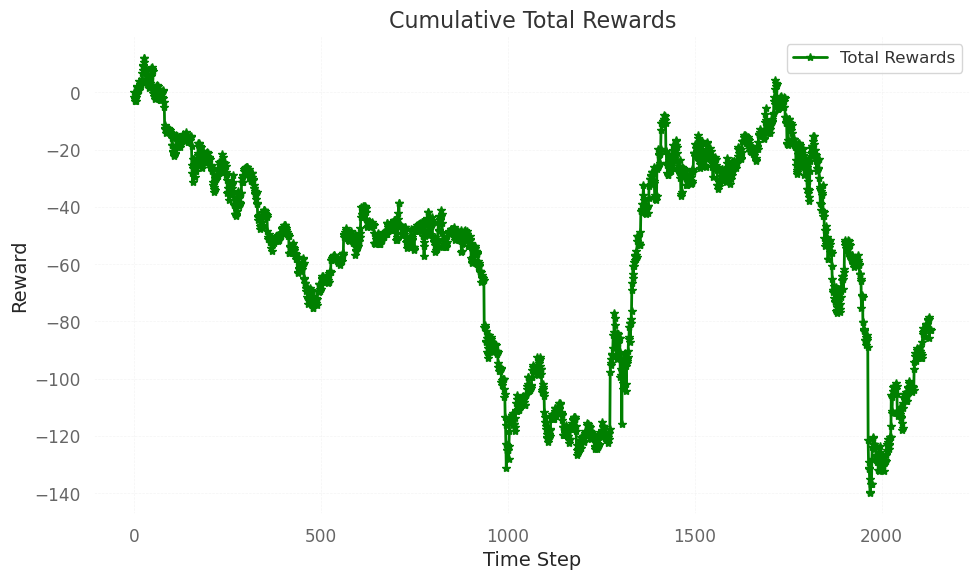

Total rewards: -83.14951645282783
Episode: 25/30, Score: <module 'time' (built-in)>, Epsilon: 0.88
Total return of portfolio: -100.00%


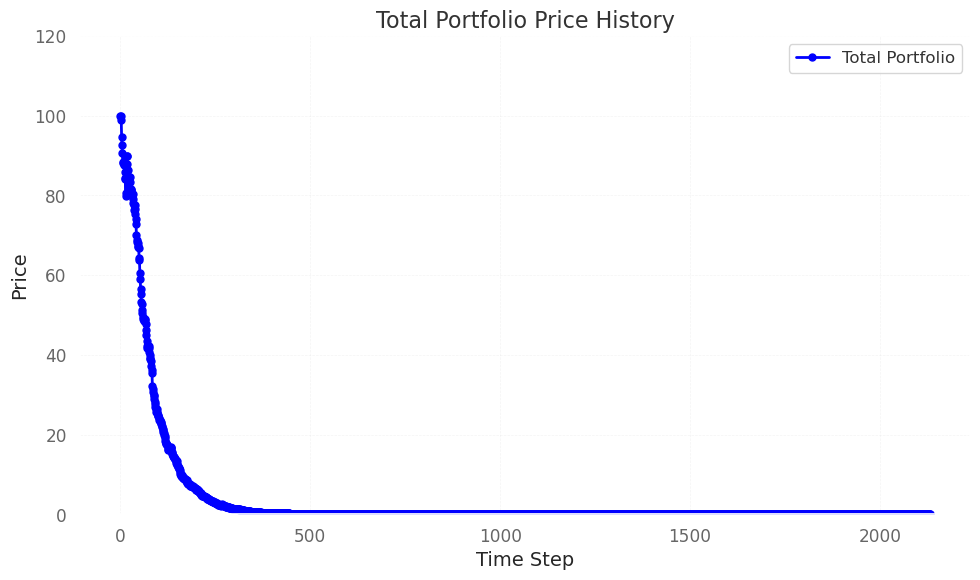

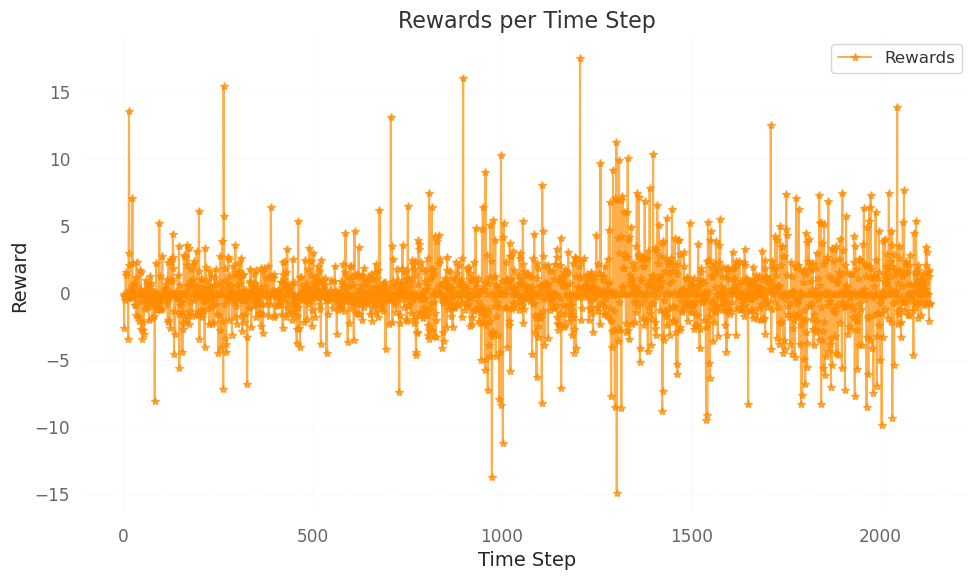

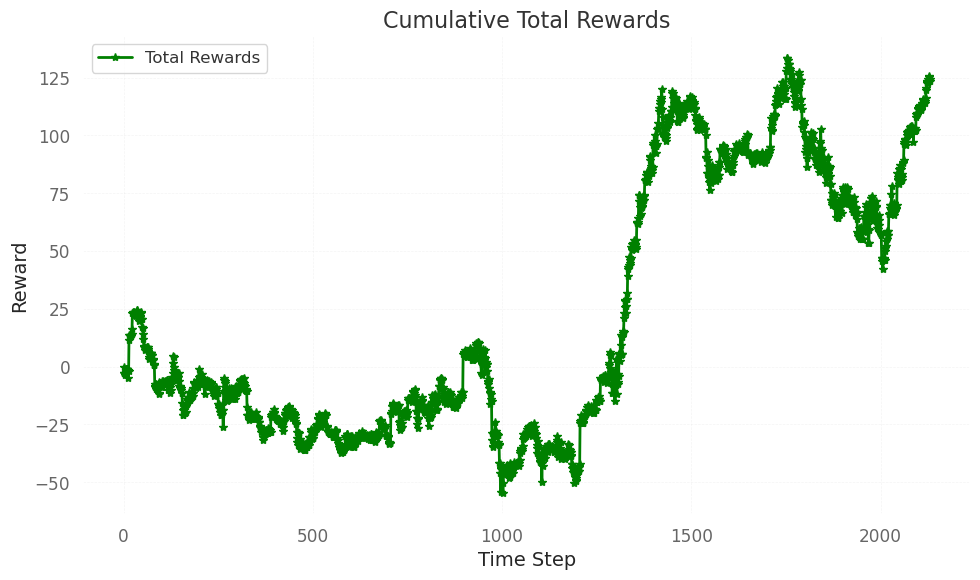

Total rewards: 123.61344082013548
Episode: 26/30, Score: <module 'time' (built-in)>, Epsilon: 0.88
Total return of portfolio: -100.00%


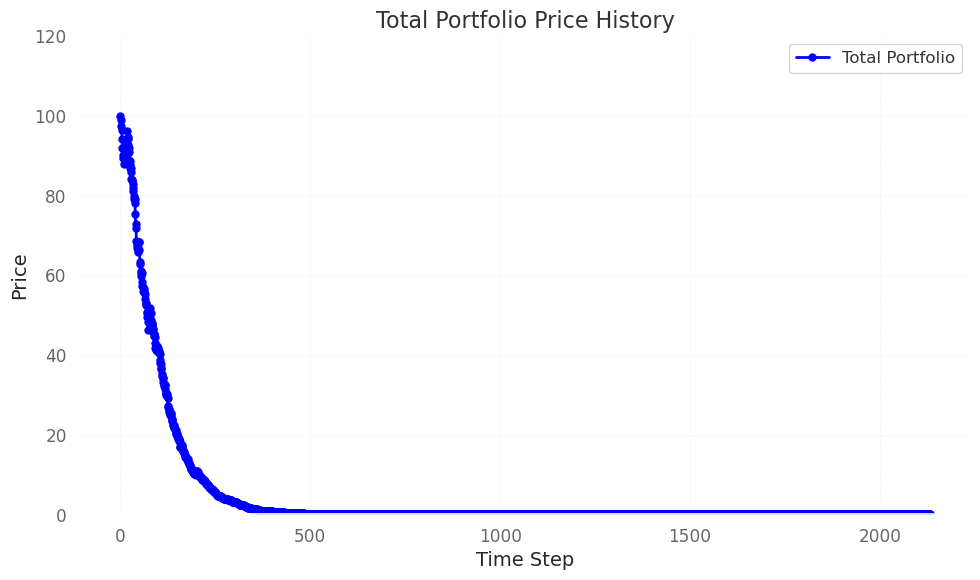

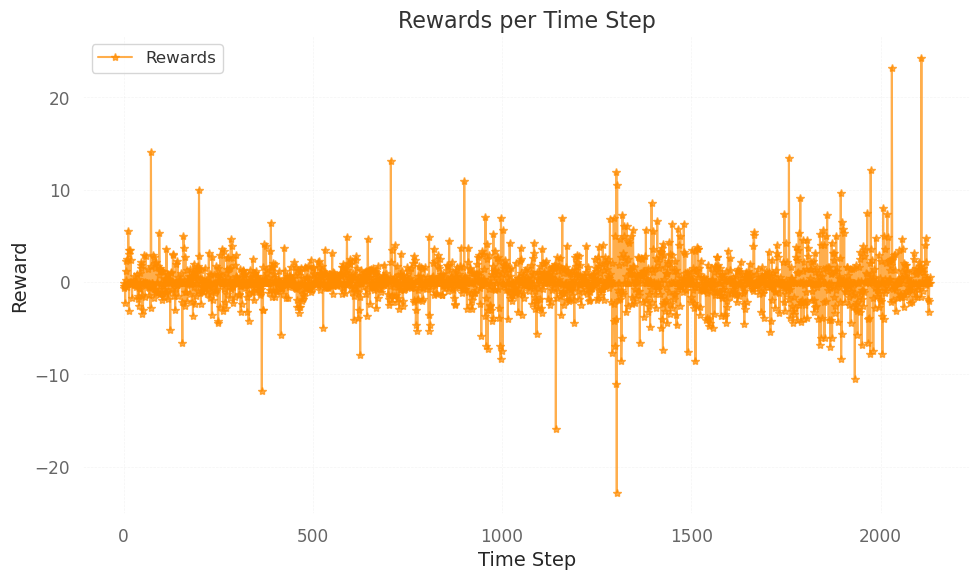

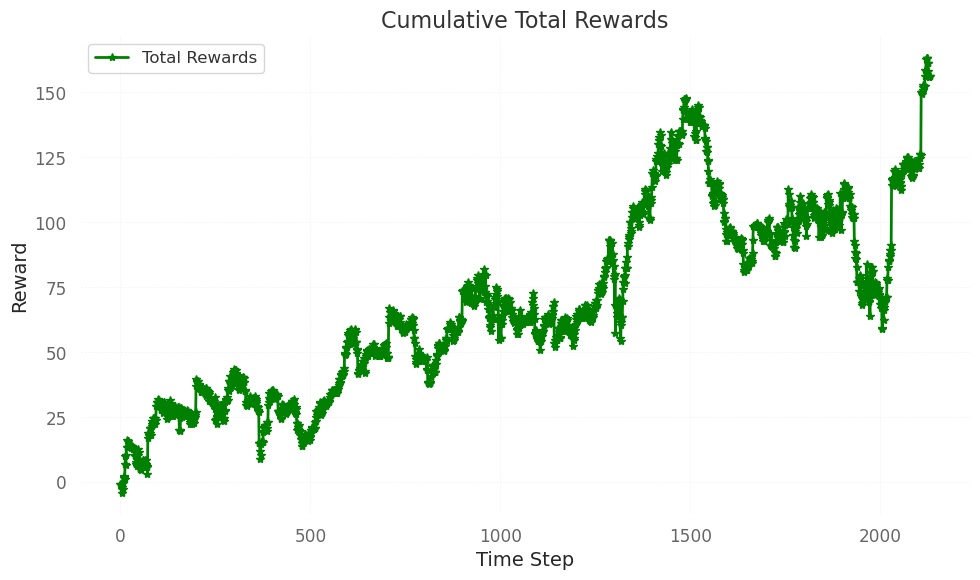

Total rewards: 156.4150087185206
Episode: 27/30, Score: <module 'time' (built-in)>, Epsilon: 0.87
Total return of portfolio: -100.00%


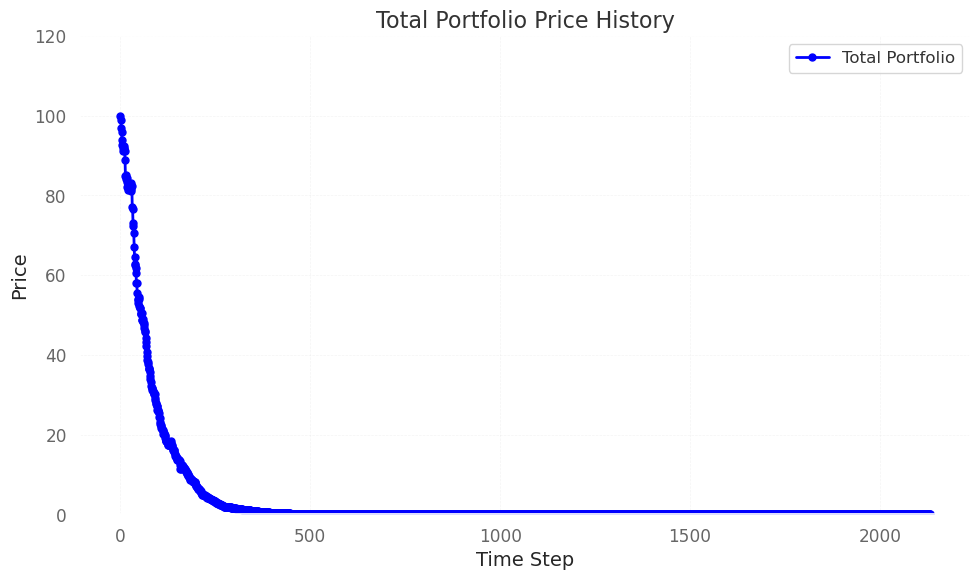

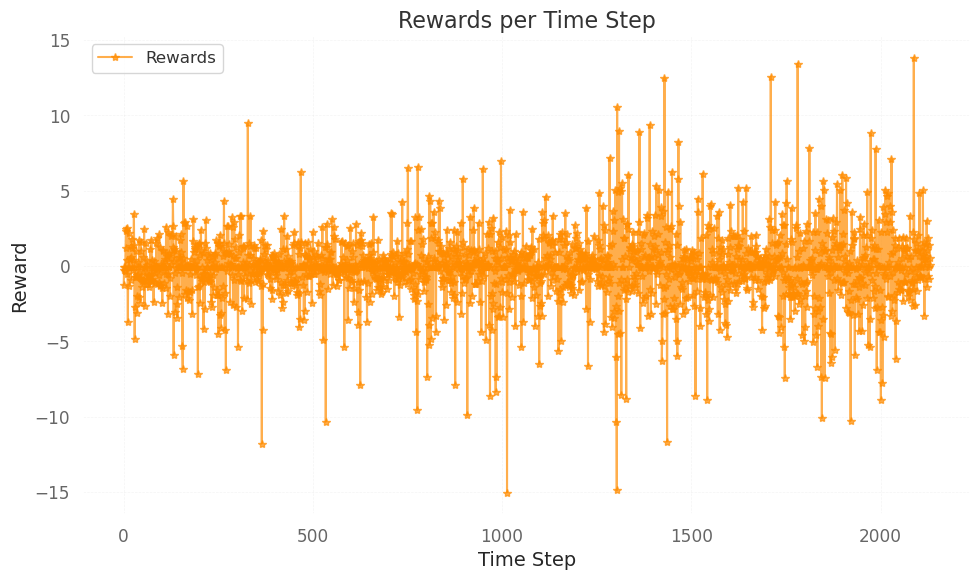

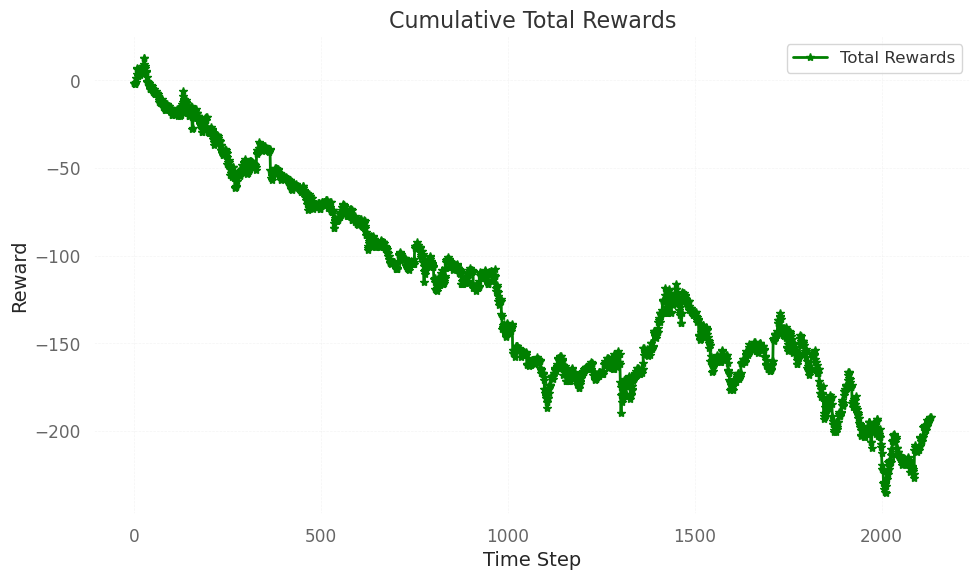

Total rewards: -192.04474938145333
Episode: 28/30, Score: <module 'time' (built-in)>, Epsilon: 0.87
Total return of portfolio: -100.00%


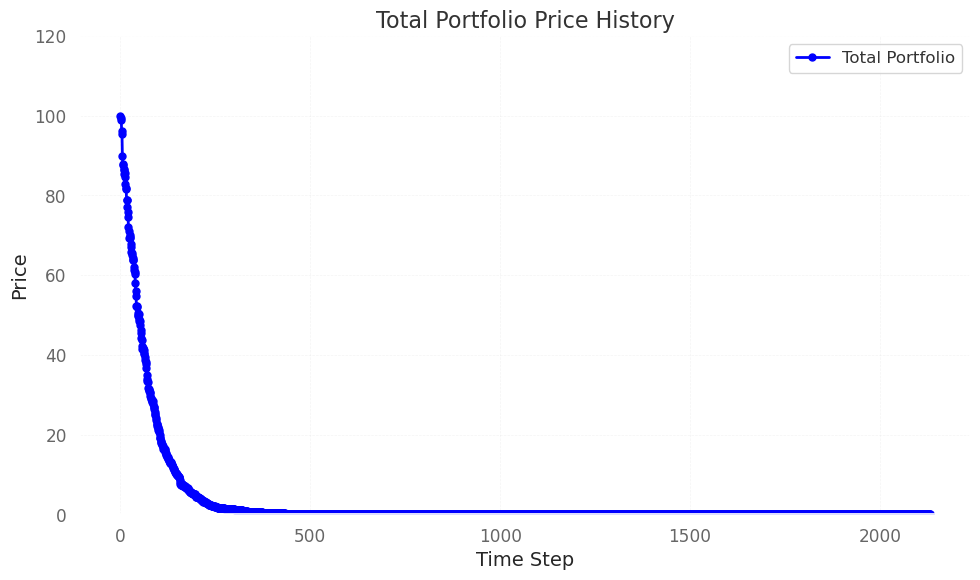

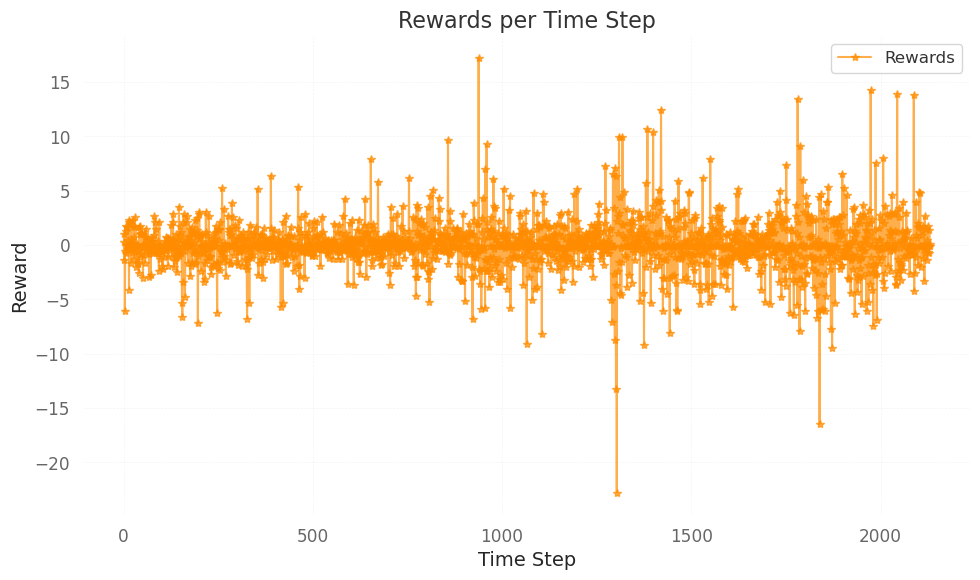

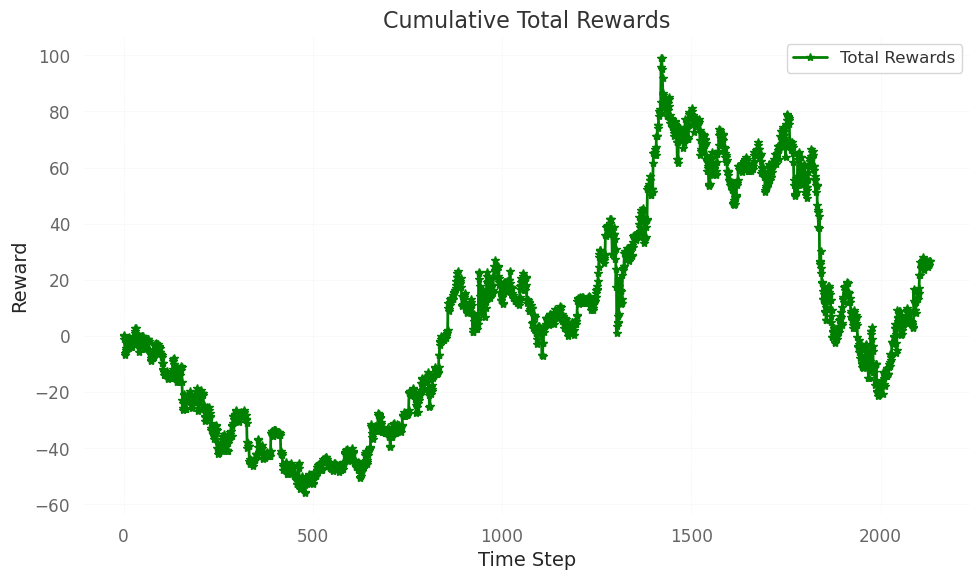

Total rewards: 26.677388169248193
Episode: 29/30, Score: <module 'time' (built-in)>, Epsilon: 0.86
Total return of portfolio: -100.00%


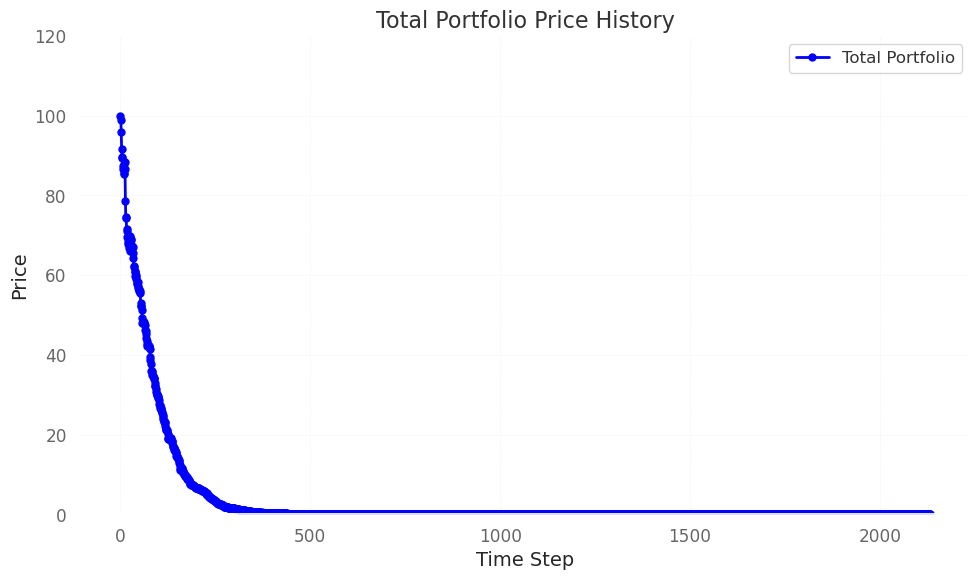

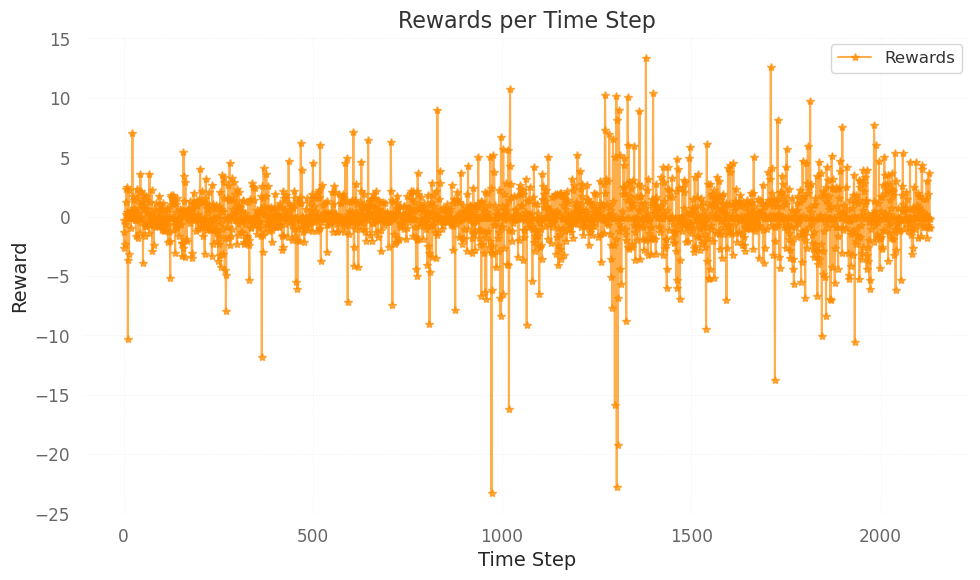

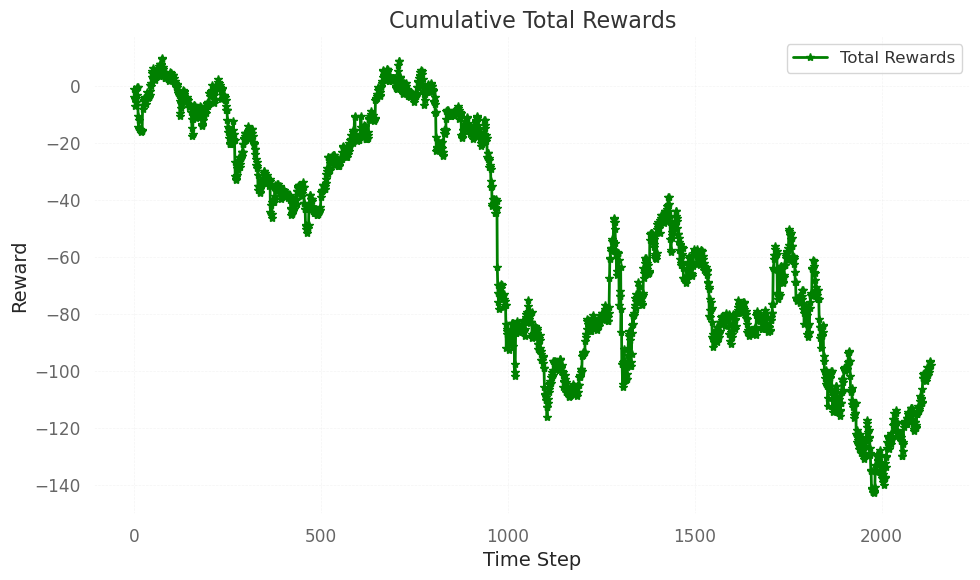

Total rewards: -97.96100531047107
Evaluating model: kRL


In [5]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.batch_size = 32
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Flatten(input_shape=(1, self.state_size)))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])

    def replay(self):
        if len(self.memory) < self.batch_size:
            return

        minibatch = np.random.choice(len(self.memory), self.batch_size, replace=False)
        for i in minibatch:
            state, action, reward, next_state, done = self.memory[i]
            target = reward
            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize Gymnasium environment and agent
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

episodes = 30
for e in range(episodes):
    state, _ = env.reset()
    done = False
    state = np.reshape(state, [1, 1, state_size])
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            print(f"Episode: {e}/{episodes}, Score: {time}, Epsilon: {agent.epsilon:.2f}")
            _ = env.returns()
            env.render(mode='total')
            env.render(mode='rewards')
            break

    agent.replay()


model_name = 'kRL'    
# Evaluate the model on training and test environments
print(f"Evaluating model: {model_name}")

In [6]:
import pandas as pd
import yfinance as yf

# Function to get S&P 500 tickers from a reliable source
def get_sp500_tickers():
    # URL for S&P 500 tickers
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(url)
    df = table[0]
    tickers = df['Symbol'].tolist()
    # Filter out tickers containing '.'
    tickers = [ticker for ticker in tickers if '.' not in ticker]
    return tickers

# Get the top N traded stocks based on average trading volume
def get_top_traded_stocks(n=112):
    sp500_tickers = get_sp500_tickers()

    # Download data for the last 7 days
    data = yf.download(sp500_tickers, period="5d", group_by="ticker", threads=True)

    # Calculate average trading volume
    avg_volumes = {}
    for ticker in sp500_tickers:
        try:
            avg_volumes[ticker] = data[ticker]['Volume'].mean()
        except KeyError:
            avg_volumes[ticker] = 0
            continue

    # Sort stocks by average trading volume
    top_traded_stocks = sorted(avg_volumes, key=avg_volumes.get, reverse=True)[:n]
    return top_traded_stocks

# Get the top 112 traded stocks
top_112_stocks = get_top_traded_stocks(112)
print(top_112_stocks)



[*********************100%***********************]  500 of 500 completed


['NVDA', 'TSLA', 'PLTR', 'AVGO', 'F', 'INTC', 'SMCI', 'MU', 'AAPL', 'AMD', 'PFE', 'T', 'UBER', 'AMZN', 'GOOGL', 'WBD', 'BAC', 'WBA', 'GOOG', 'CVS', 'MSFT', 'CSCO', 'CMCSA', 'WFC', 'KO', 'WMT', 'VZ', 'CCL', 'XOM', 'HBAN', 'AMCR', 'HPE', 'OXY', 'SLB', 'LRCX', 'DVN', 'BA', 'NKE', 'C', 'KDP', 'KHC', 'BMY', 'NEM', 'META', 'KMI', 'PCG', 'CSX', 'AES', 'FCX', 'SCHW', 'GM', 'MRK', 'CVX', 'KEY', 'KVUE', 'MDLZ', 'SBUX', 'DIS', 'HAL', 'UNH', 'MCHP', 'NEE', 'DOW', 'JPM', 'PYPL', 'QCOM', 'EXC', 'JNJ', 'PARA', 'ORCL', 'TFC', 'APH', 'CNC', 'COP', 'ANET', 'USB', 'RF', 'MO', 'HPQ', 'CMG', 'NCLH', 'HST', 'VTRS', 'AMAT', 'WMB', 'ON', 'APA', 'V', 'ADBE', 'WDC', 'GILD', 'EQT', 'MRNA', 'DAL', 'DELL', 'PEP', 'CRM', 'CARR', 'LW', 'MS', 'ABBV', 'EW', 'GIS', 'IPG', 'LUV', 'CTRA', 'GE', 'PG', 'CCI', 'TJX', 'CNP', 'MDT']


In [3]:
len(top_112_stocks)

112